In [8]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib
import statistics
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import math
import glob
from itertools import combinations
from matplotlib import pyplot as plt
from Bio import Phylo
import biotite
from pca_plot import *

In [16]:
## Read and merge files 
anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1')

ids_hg19 = pd.DataFrame()
ids_hg19['SAMPLE'] = anotation['3-Illumina_ID']
ids_hg19['REGION'] = anotation['10-Region']
ids_hg19['COUNTRY'] = anotation['11-Country']

In [17]:
####Results from chm13_data_gene_regions.py  
## Output is called in the next cell


In [18]:
chm13 = pd.read_csv('/branchinecta/jbazanwilliamson/cnv_analysis/chm13_gene_regions.csv', index_col=0)
chm13['LENGHT'] = chm13['END'] - chm13['START']
chm13 = chm13.drop(columns=['START_GENE', 'END_GENE'])
chm13 = chm13.drop_duplicates()
chm13#['TYPE'].value_counts()

/opt/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


SAMPLE   CHR      START        END  SCORE         TYPE  \
0        LP6005441-DNA_B02  chrX     105118     116978      1     DELETION   
18       LP6005441-DNA_B02  chrX    1038532    1048096      1     DELETION   
21       LP6005441-DNA_B02  chrX    1193541    1202443      1     DELETION   
24       LP6005441-DNA_B02  chrX    1296349    1304923      1     DELETION   
26       LP6005441-DNA_B02  chrX    1855267    1863572      1     DELETION   
...                    ...   ...        ...        ...    ...          ...   
1874421  LP6005442-DNA_H01  chr1  247606647  247620901      5  DUPLICATION   
1874427  LP6005442-DNA_H01  chr1  247629795  247637933      4  DUPLICATION   
1874430  LP6005442-DNA_H01  chr1  247738073  247750886      6  DUPLICATION   
1874432  LP6005442-DNA_H01  chr1  247954331  247967419      4  DUPLICATION   
1874434  LP6005442-DNA_H01  chr1  248159841  248170419      3  DUPLICATION   

         LENGHT  
0         11860  
18         9564  
21         8902  
24         8574  
26         8305  
...         ...  
1874421   14254  
1874427    8138  
1874430   12813  
1874432   13088  
1874434   10578  

[472598 rows x 7 columns]

In [19]:
## Filter by chromosomes
data_x = chm13[chm13.CHR == 'chrX']
data_no_sex_chr = chm13[chm13.CHR != 'chrY']
data_no_sex_chr = data_no_sex_chr[data_no_sex_chr.CHR != 'chrX']

data_no_sex_chr

SAMPLE    CHR      START        END  SCORE         TYPE  \
165      LP6005441-DNA_B02  chr22   18805936   18816025      1     DELETION   
166      LP6005441-DNA_B02  chr22   25035009   25045165      1     DELETION   
170      LP6005441-DNA_B02  chr22   25234701   25242766      1     DELETION   
176      LP6005441-DNA_B02  chr22   32151736   32167381      1     DELETION   
178      LP6005441-DNA_B02  chr22   33010661   33020973      1     DELETION   
...                    ...    ...        ...        ...    ...          ...   
1874421  LP6005442-DNA_H01   chr1  247606647  247620901      5  DUPLICATION   
1874427  LP6005442-DNA_H01   chr1  247629795  247637933      4  DUPLICATION   
1874430  LP6005442-DNA_H01   chr1  247738073  247750886      6  DUPLICATION   
1874432  LP6005442-DNA_H01   chr1  247954331  247967419      4  DUPLICATION   
1874434  LP6005442-DNA_H01   chr1  248159841  248170419      3  DUPLICATION   

         LENGHT  
165       10089  
166       10156  
170        8065  
176       15645  
178       10312  
...         ...  
1874421   14254  
1874427    8138  
1874430   12813  
1874432   13088  
1874434   10578  

[345958 rows x 7 columns]

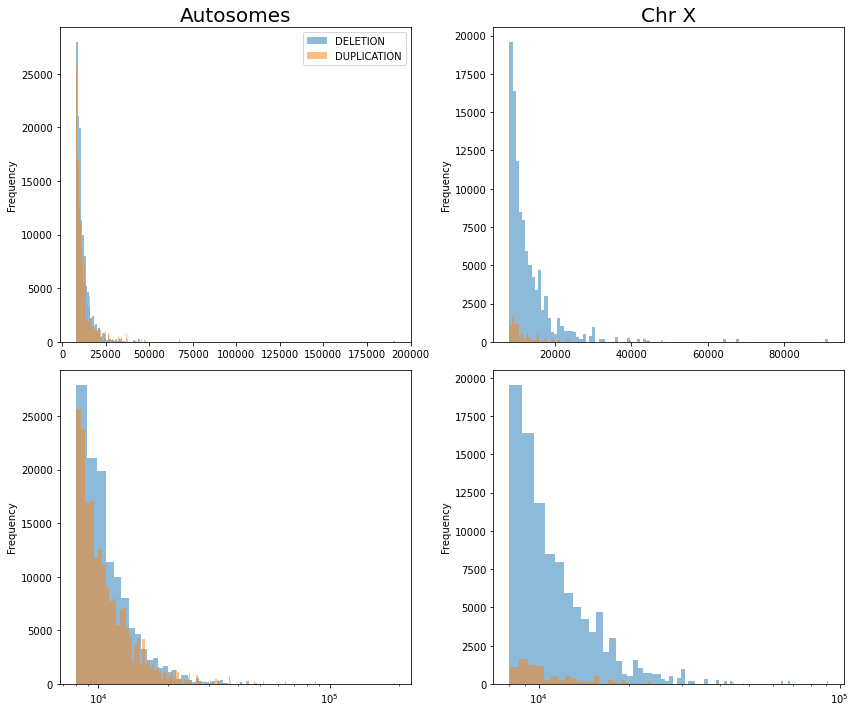

In [20]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(12, 10, forward=True)

axs[0, 0].set_title('Autosomes', size=20)

df1 = data_no_sex_chr.groupby(['TYPE'])['LENGHT']

df1.plot(kind='hist',stacked=True, bins=200, legend=True, ax=axs[0,0], xlabel='Size', alpha=0.5) # alpha for transparency
#plt.xlabel('Size')


df2 = data_no_sex_chr.groupby(['TYPE'])['LENGHT']

df2.plot(kind='hist',stacked=True, bins=200, logx=True, ax=axs[1,0], alpha=0.5) # alpha for transparency
#plt.xlabel('Size')


#fig.suptitle
axs[0, 1].set_title('Chr X', size=20)

df3 = data_x.groupby(['TYPE'])['LENGHT']

df3.plot(kind='hist',stacked=True, bins=100, ax=axs[0,1], alpha=0.5) # alpha for transparency

#plt.show()

df4 = data_x.groupby(['TYPE'])['LENGHT']

df4.plot(kind='hist',stacked=True, bins=100,logx=True, ax=axs[1,1], alpha=0.5) # alpha for transparency


fig.tight_layout() 
plt.savefig('../plots/distribution_chm13.png', transparent=True)
plt.show()

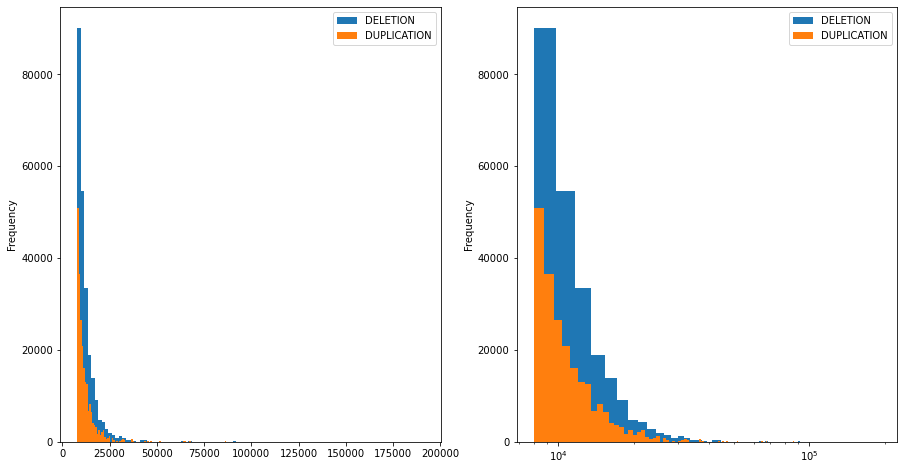

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

df_plot= chm13.groupby(['TYPE'])['LENGHT']

df_plot.plot(kind='hist',stacked=True, bins=100, legend=True, ax=axs[0]) # alpha for transparency

plt.xscale('log')
#plt.show()

df_plot = chm13.groupby(['TYPE'])['LENGHT']

df_plot.plot(kind='hist',stacked=True, bins=100, legend=True, ax=axs[1]) # alpha for transparency

plt.show()

In [22]:
#subsetting deletions and duplications
deletions = chm13[chm13['TYPE'] =='DELETION']
duplications = chm13[chm13['TYPE'] == 'DUPLICATION']
deletions

biallelic_duplications = duplications[duplications['SCORE'] < 5 ] 
biallelic_duplications

SAMPLE   CHR      START        END  SCORE         TYPE  \
961235   LP6005441-DNA_B02  chrX   12119426   12128395      3  DUPLICATION   
961243   LP6005441-DNA_B02  chrX   36927247   36935767      3  DUPLICATION   
961244   LP6005441-DNA_B02  chrX   36983761   36991872      3  DUPLICATION   
961248   LP6005441-DNA_B02  chrX   37359626   37379401      3  DUPLICATION   
961263   LP6005441-DNA_B02  chrX   45920595   45935886      3  DUPLICATION   
...                    ...   ...        ...        ...    ...          ...   
1874406  LP6005442-DNA_H01  chr1  244109432  244120542      3  DUPLICATION   
1874409  LP6005442-DNA_H01  chr1  246431276  246439465      3  DUPLICATION   
1874427  LP6005442-DNA_H01  chr1  247629795  247637933      4  DUPLICATION   
1874432  LP6005442-DNA_H01  chr1  247954331  247967419      4  DUPLICATION   
1874434  LP6005442-DNA_H01  chr1  248159841  248170419      3  DUPLICATION   

         LENGHT  
961235     8969  
961243     8520  
961244     8111  
961248    19775  
961263    15291  
...         ...  
1874406   11110  
1874409    8189  
1874427    8138  
1874432   13088  
1874434   10578  

[141130 rows x 7 columns]

In [23]:
#change to df when using telomeres and centromeres filtration
final_cnv = deletions.pivot_table(index=["CHR", "START", "END"], 
                    columns='SAMPLE', 
                    values='SCORE').reset_index()


#final_cnv = final_cnv.dropna(thresh=100)
final_cnv

SAMPLE   CHR     START       END  LP6005441-DNA_A01  LP6005441-DNA_A03  \
0       chr1    521722    540598                NaN                NaN   
1       chr1    839350    851555                NaN                NaN   
2       chr1   1041679   1050074                NaN                NaN   
3       chr1   1199726   1209870                NaN                NaN   
4       chr1   1382671   1391067                NaN                NaN   
...      ...       ...       ...                ...                ...   
8182    chrY  26436587  26458551                NaN                0.0   
8183    chrY  26778516  26788355                NaN                0.0   
8184    chrY  62325695  62345374                NaN                NaN   
8185    chrY  62345374  62363313                NaN                NaN   
8186    chrY  62411230  62422895                NaN                NaN   

SAMPLE  LP6005441-DNA_A04  LP6005441-DNA_A05  LP6005441-DNA_A06  \
0                     NaN                NaN                NaN   
1                     NaN                NaN                NaN   
2                     1.0                1.0                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   
...                   ...                ...                ...   
8182                  0.0                NaN                NaN   
8183                  0.0                NaN                NaN   
8184                  NaN                NaN                NaN   
8185                  NaN                NaN                NaN   
8186                  NaN                NaN                NaN   

SAMPLE  LP6005441-DNA_A08  LP6005441-DNA_A09  ...  LP6005677-DNA_D03  \
0                     NaN                NaN  ...                1.0   
1                     NaN                NaN  ...                NaN   
2                     1.0                NaN  ...                1.0   
3                     NaN                NaN  ...                NaN   
4                     NaN                NaN  ...                NaN   
...                   ...                ...  ...                ...   
8182                  NaN                NaN  ...                0.0   
8183                  NaN                NaN  ...                0.0   
8184                  NaN                1.0  ...                NaN   
8185                  NaN                1.0  ...                NaN   
8186                  NaN                1.0  ...                NaN   

SAMPLE  LP6005677-DNA_E01  LP6005677-DNA_F01  LP6005677-DNA_G01  \
0                     NaN                NaN                NaN   
1                     1.0                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                1.0                NaN   
...                   ...                ...                ...   
8182                  NaN                0.0                NaN   
8183                  NaN                0.0                NaN   
8184                  NaN                NaN                NaN   
8185                  NaN                NaN                NaN   
8186                  NaN                NaN                NaN   

SAMPLE  LP6007068-DNA_A01  LP6007069-DNA_A01  SS6004471  SS6004477  SS6004478  \
0                     NaN                NaN        1.0        NaN        1.0   
1                     NaN                NaN        NaN        NaN        NaN   
2                     1.0                1.0        1.0        NaN        NaN   
3                     NaN                NaN        1.0        1.0        NaN   
4                     NaN                NaN        NaN        NaN        NaN   
...                   ...                ...        ...        ...        ...   
8182                  NaN                0.0        NaN        NaN   

In [24]:
from scipy import stats
#final_cnv = final_cnv.iloc[new]
final = final_cnv.iloc[:,3:284]
counts = final
counts = counts.fillna(2)

#counts = counts[counts.columns.intersection(counts_a.columns)]

#counts = counts.drop(columns=['LP6005592-DNA_G03',
#                     'LP6005443-DNA_E10',
#                     'LP6005442-DNA_E04'])

counts = counts.T
counts = counts.sort_index()
counts

0     1     2     3     4     5     6     7     8     9     \
SAMPLE                                                                          
LP6005441-DNA_A01   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_A03   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_A04   2.0   2.0   1.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_A05   2.0   2.0   1.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_A06   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
LP6007069-DNA_A01   2.0   2.0   1.0   2.0   2.0   2.0   2.0   2.0   1.0   1.0   
SS6004471           1.0   2.0   1.0   1.0   2.0   2.0   2.0   2.0   1.0   1.0   
SS6004477           2.0   2.0   2.0   1.0   2.0   2.0   2.0   2.0   1.0   1.0   
SS6004478           1.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   1.0   1.0   
SS6004480           1.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   1.0   1.0   

                   ...  8177  8178  8179  8180  8181  8182  8183  8184  8185  \
SAMPLE             ...                                                         
LP6005441-DNA_A01  ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_A03  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   2.0   
LP6005441-DNA_A04  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   2.0   
LP6005441-DNA_A05  ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_A06  ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
LP6007069-DNA_A01  ...   0.0   0.0   0.0   1.0   1.0   0.0   0.0   2.0   2.0   
SS6004471          ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
SS6004477          ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
SS6004478          ...   0.0   0.0   0.0   1.0   0.0   0.0   0.0   2.0   2.0   
SS6004480          ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   

                   8186  
SAMPLE                   
LP6005441-DNA_A01   2.0  
LP6005441-DNA_A03   2.0  
LP6005441-DNA_A04   2.0  
LP6005441-DNA_A05   2.0  
LP6005441-DNA_A06   2.0  
...                 ...  
LP6007069-DNA_A01   2.0  
SS6004471           2.0  
SS6004477           2.0  
SS6004478           2.0  
SS6004480           2.0  

[269 rows x 8187 columns]

In [25]:
features = ids_hg19.set_index('SAMPLE').merge(counts, left_index=True, right_index=True)
features = features.loc[:,['REGION', 'COUNTRY']]
features = features.sort_index()
features 

REGION           COUNTRY
SAMPLE                                          
LP6005441-DNA_A01  WestEurasia  Russia(Caucasus)
LP6005441-DNA_A03      Oceania    PapuaNewGuinea
LP6005441-DNA_A04      America          Colombia
LP6005441-DNA_A05  WestEurasia            France
LP6005441-DNA_A06  WestEurasia    Italy(Bergamo)
...                        ...               ...
LP6007069-DNA_A01  WestEurasia            Greece
SS6004471               Africa             Congo
SS6004477              Oceania         Australia
SS6004478              Oceania         Australia
SS6004480               Africa             Sudan

[269 rows x 2 columns]

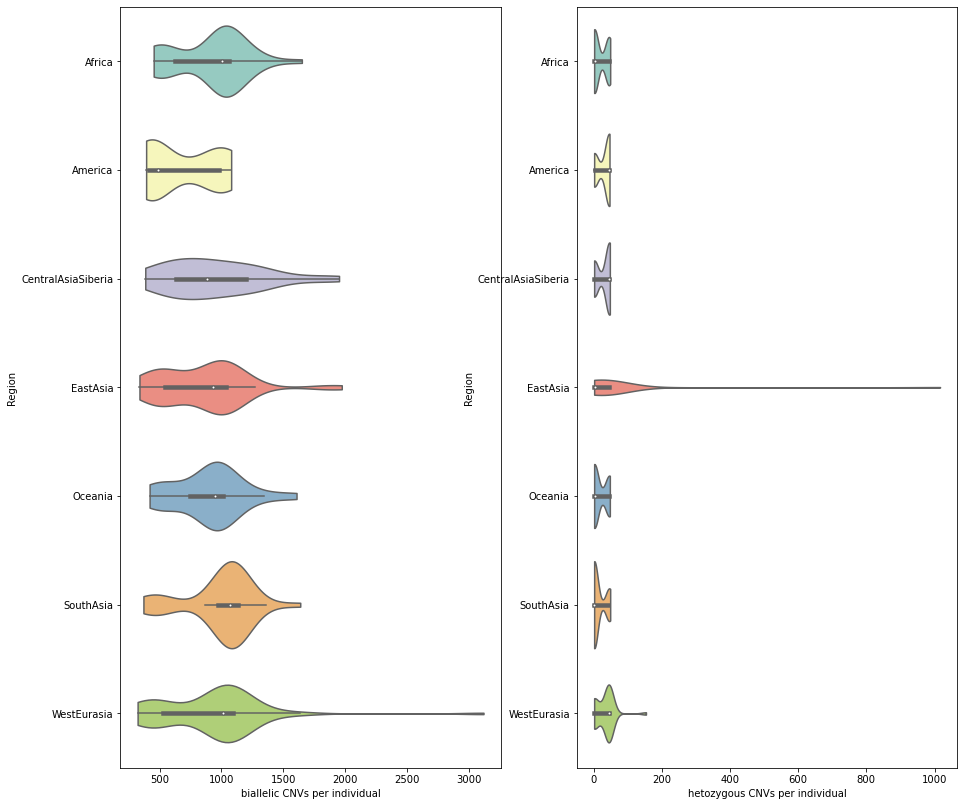

In [26]:
#import seaborn as sns

#pd.set_option("display.max_rows", None, "display.max_columns", None)
biallelic_deletions = deletions[deletions['SCORE'] < 2 ] 
biallelic_deletions = biallelic_deletions.groupby('SAMPLE').size()

biallelic_deletions = pd.DataFrame(biallelic_deletions)
#biallelic_deletions = biallelic_deletions.set_index('SAMPLE')

biallelic_deletions = features.merge(biallelic_deletions, left_index=True, right_index=True)
#biallelic_deletions = biallelic_deletions.reset_index()

#heterozygous_deletions.value_counts('SAMPLE').sort_index()
biallelic_deletions.columns = ['REGION', 'COUNTRY','TYPE']
biallelic_deletions


#pd.set_option("display.max_rows", None, "display.max_columns", None)
heterozygous_deletions = deletions[deletions['SCORE'] < 1] 
heterozygous_deletions = heterozygous_deletions.groupby('SAMPLE').size()
heterozygous_deletions = pd.DataFrame(heterozygous_deletions)
heterozygous_deletions = features.merge(heterozygous_deletions, left_index=True, right_index=True)
heterozygous_deletions.columns = ['REGION','COUNTRY', 'TYPE']
heterozygous_deletions
heterozygous_deletions


fig, axs = plt.subplots(1, 2, figsize=(15, 14))

ax = seaborn.violinplot(x="TYPE", y="REGION", data=biallelic_deletions, palette='Set3', order=[ "Africa","America", "CentralAsiaSiberia","EastAsia", "Oceania", "SouthAsia", "WestEurasia"], ax=axs[0], cut=0)

ax.set_xlabel("biallelic CNVs per individual")
ax.set_ylabel("Region")

ax = seaborn.violinplot(x="TYPE", y="REGION", data=heterozygous_deletions, palette='Set3', order=[ "Africa","America", "CentralAsiaSiberia","EastAsia", "Oceania", "SouthAsia", "WestEurasia"], ax=axs[1], cut=0)

ax.set_xlabel("hetozygous CNVs per individual")
ax.set_ylabel("Region")
plt.show()

In [27]:
#track features for pca & tsne
from sklearn import preprocessing

#X =preprocessing.scale(counts)

#PCA
pca = PCA(n_components=10)
pca_results = pca.fit_transform(counts)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3', 'component_4',
                                  'component_5',
                                  'component_6',
                                  'component_7',
                                  'component_8',
                                  'component_9',
                                   'component_10'
                                  ],
                          index=features.index)




df_pca = features.merge(df_pca, left_index=True, right_index=True)
df_pca

REGION           COUNTRY  component_1  component_2  \
SAMPLE                                                                       
LP6005441-DNA_A01  WestEurasia  Russia(Caucasus)    -9.728542    -1.296218   
LP6005441-DNA_A03      Oceania    PapuaNewGuinea    16.131562     1.278144   
LP6005441-DNA_A04      America          Colombia    16.097766    -2.714843   
LP6005441-DNA_A05  WestEurasia            France    -9.676231    -4.993266   
LP6005441-DNA_A06  WestEurasia    Italy(Bergamo)    -9.863429    -4.716570   
...                        ...               ...          ...          ...   
LP6007069-DNA_A01  WestEurasia            Greece    13.830281     6.005110   
SS6004471               Africa             Congo    -9.603699     5.770452   
SS6004477              Oceania         Australia    -9.619161     7.587067   
SS6004478              Oceania         Australia    15.282295     5.635296   
SS6004480               Africa             Sudan    -9.742277     1.852122   

                   component_3  component_4  component_5  component_6  \
SAMPLE                                                                  
LP6005441-DNA_A01    -0.105812    -0.480087    -0.911881     1.048474   
LP6005441-DNA_A03    -0.739627     0.000079    -0.673706     1.411491   
LP6005441-DNA_A04     0.667438    -0.305187    -0.500489     0.313927   
LP6005441-DNA_A05     0.711536    -0.696709    -0.562428     0.781139   
LP6005441-DNA_A06     0.851306    -1.302473    -0.219162     0.593683   
...                        ...          ...          ...          ...   
LP6007069-DNA_A01    -1.734064     3.320674    15.629444    -3.455430   
SS6004471            -0.663809     3.591557    16.796712     3.926811   
SS6004477            -1.223740     2.697512    13.535405     3.539434   
SS6004478            -1.161998     2.610710    15.243922    -0.411297   
SS6004480            -1.231994     1.550729    11.893458    -0.091821   

                   component_7  component_8  component_9  component_10  
SAMPLE                                                                  
LP6005441-DNA_A01    -0.943933     0.132669     0.262585     -0.935137  
LP6005441-DNA_A03    -0.797967    -0.204567     1.625627      1.059256  
LP6005441-DNA_A04    -0.101848     0.380605     0.347418     -0.632947  
LP6005441-DNA_A05     1.840495     0.152373    -2.033856      0.318562  
LP6005441-DNA_A06     0.736122    -0.034517    -0.808866     -0.076132  
...                        ...          ...          ...           ...  
LP6007069-DNA_A01     2.488924    -2.424516    -1.763168     -0.366474  
SS6004471             1.900796     2.985204     3.033019      2.862314  
SS6004477            -0.693021     1.372916     3.958169     -1.295516  
SS6004478             1.294694     0.109429     1.702770      1.887068  
SS6004480             1.948098    -2.048596    -4.917716      0.170056  

[269 rows x 12 columns]

In [28]:
pca.explained_variance_ratio_

array([0.32232299, 0.0438211 , 0.02930827, 0.02362963, 0.01226472,
       0.00821671, 0.00676457, 0.00622644, 0.00591006, 0.0053608 ])

                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739627   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851306   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005110    -1.734064   
Africa                  Congo    -9.603699     5.770452    -0.663809   
Oceania             Australia    -9.619161     7.587067    -1.223740   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231994   

             component_4  component_5  component_6  component_7

                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739627   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851306   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005110    -1.734064   
Africa                  Congo    -9.603699     5.770452    -0.663809   
Oceania             Australia    -9.619161     7.587067    -1.223740   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231994   

             component_4  component_5  component_6  component_7

                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739627   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851306   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005110    -1.734064   
Africa                  Congo    -9.603699     5.770452    -0.663809   
Oceania             Australia    -9.619161     7.587067    -1.223740   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231994   

             component_4  component_5  component_6  component_7

/branchinecta/jbazanwilliamson/cnv_analysis/cnv_sgdp/scripts/pca_plot.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  tight_layout=True


                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739627   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851306   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005110    -1.734064   
Africa                  Congo    -9.603699     5.770452    -0.663809   
Oceania             Australia    -9.619161     7.587067    -1.223740   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231994   

             component_4  component_5  component_6  component_7

Count of groups by factor: 7
                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739627   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851306   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005110    -1.734064   
Africa                  Congo    -9.603699     5.770452    -0.663809   
Oceania             Australia    -9.619161     7.587067    -1.223740   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231994   

             component_4  componen

Count of groups by factor: 7


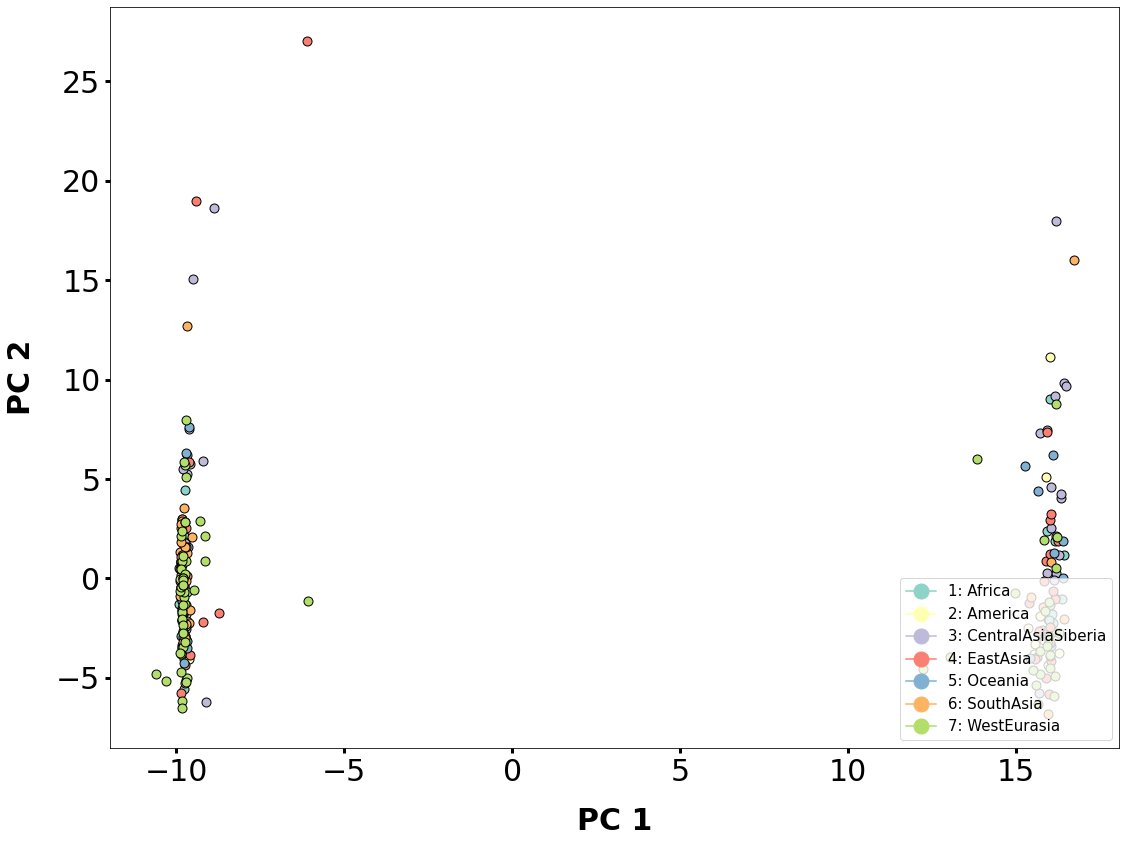

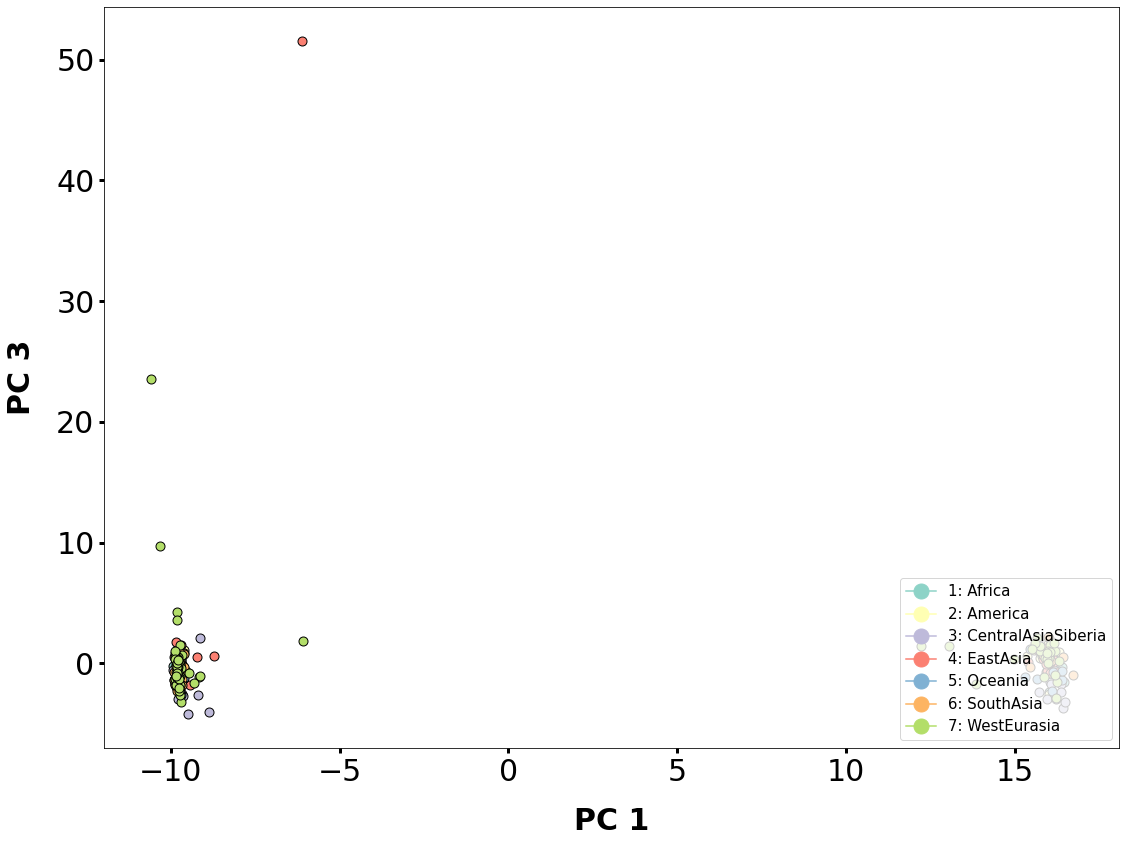

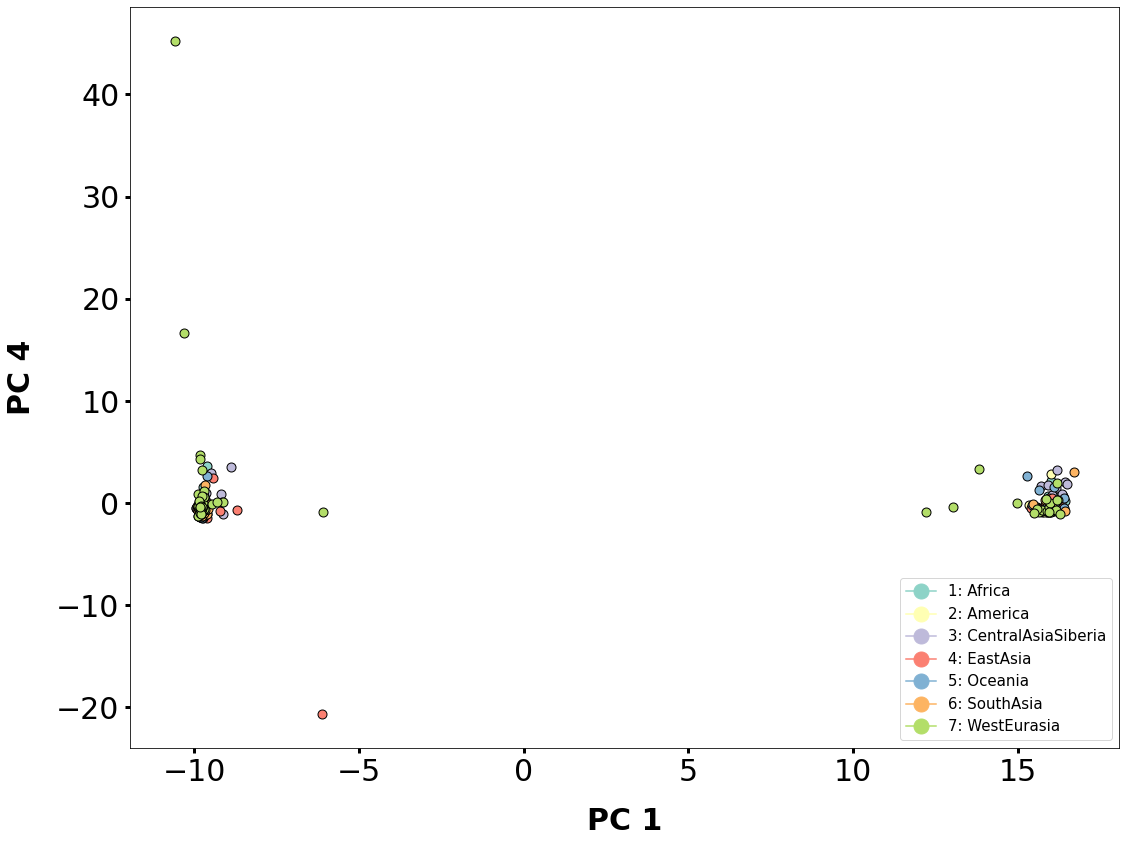

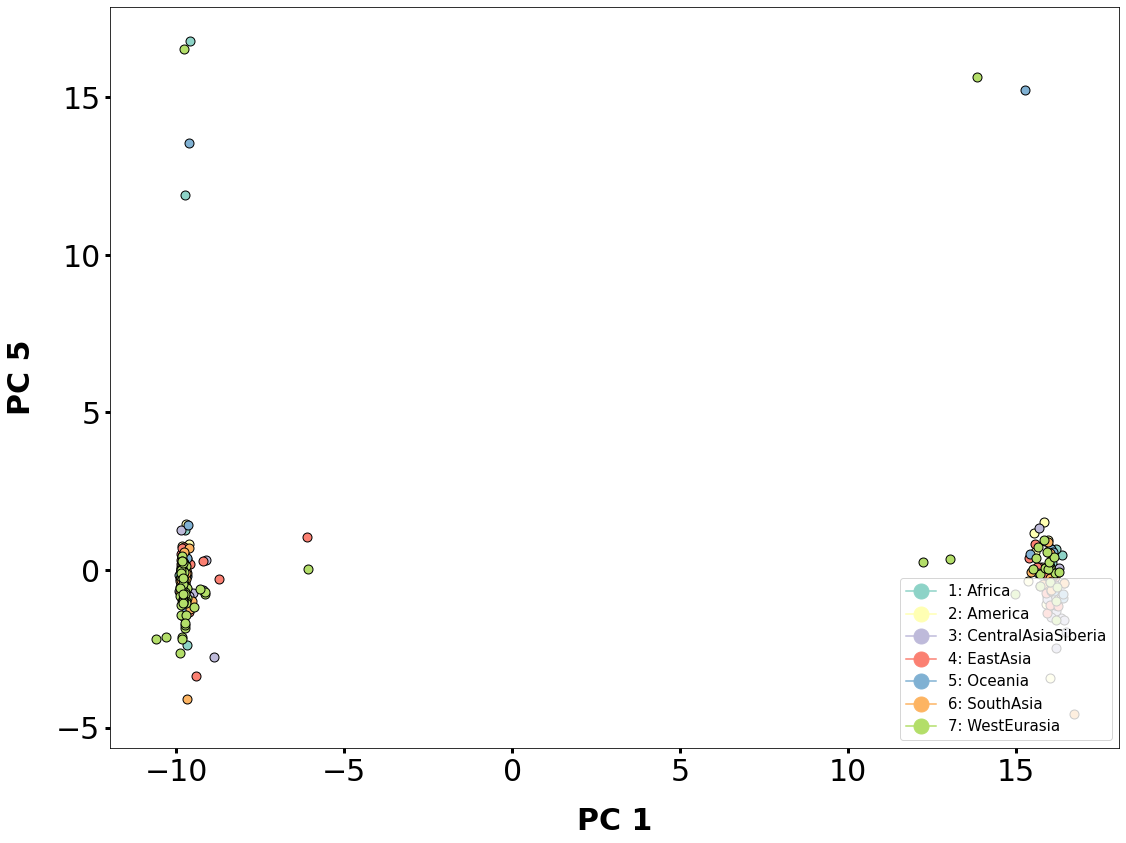

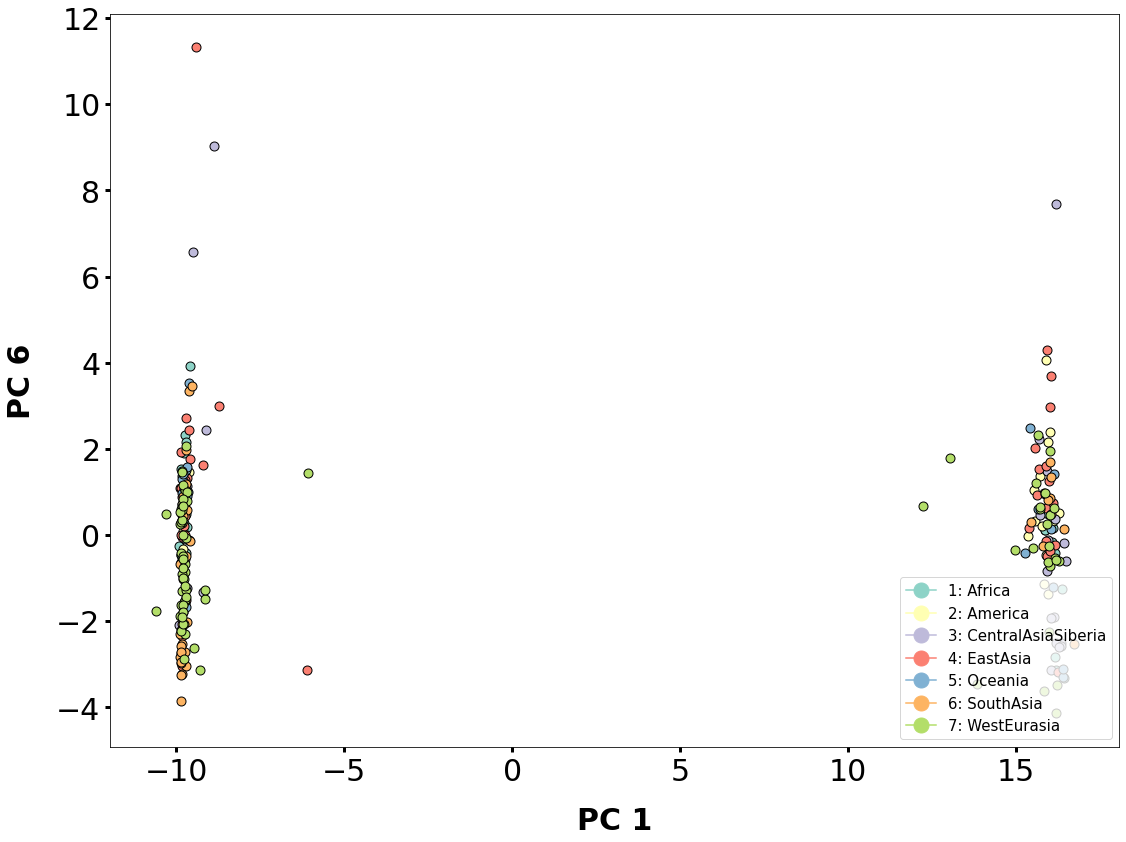

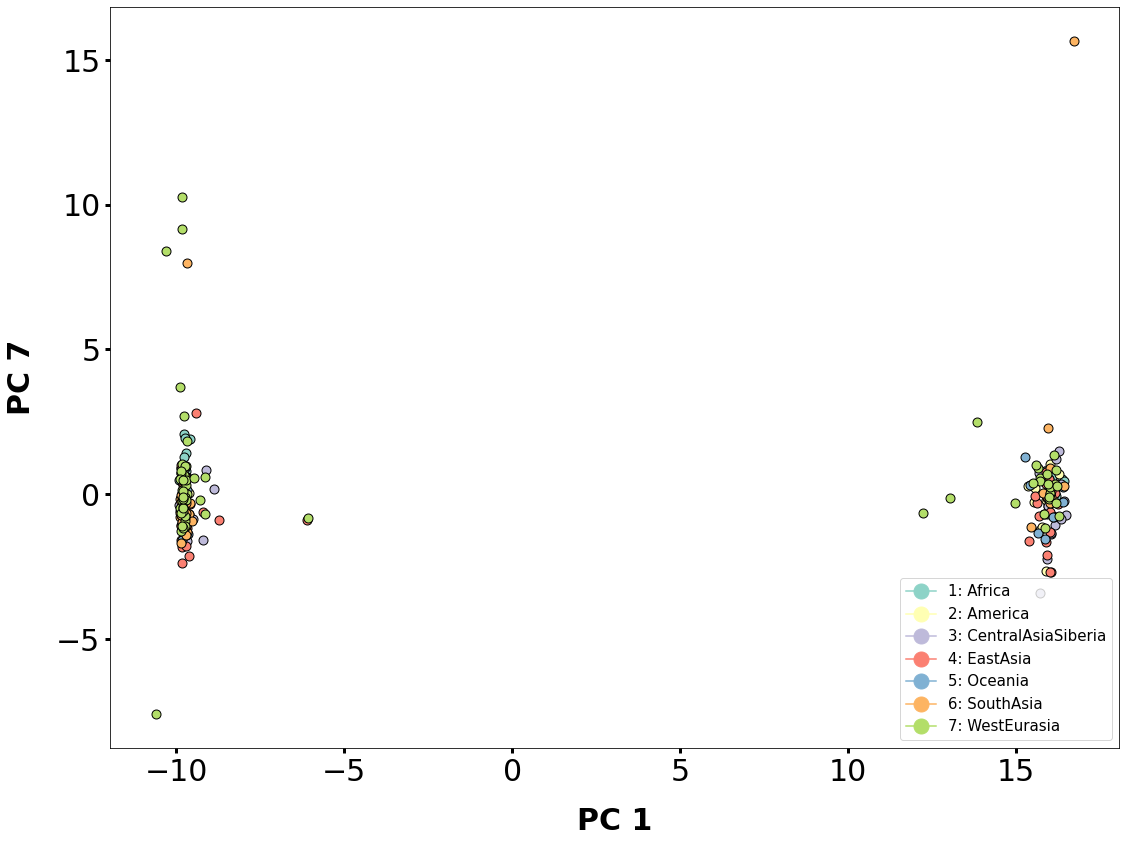

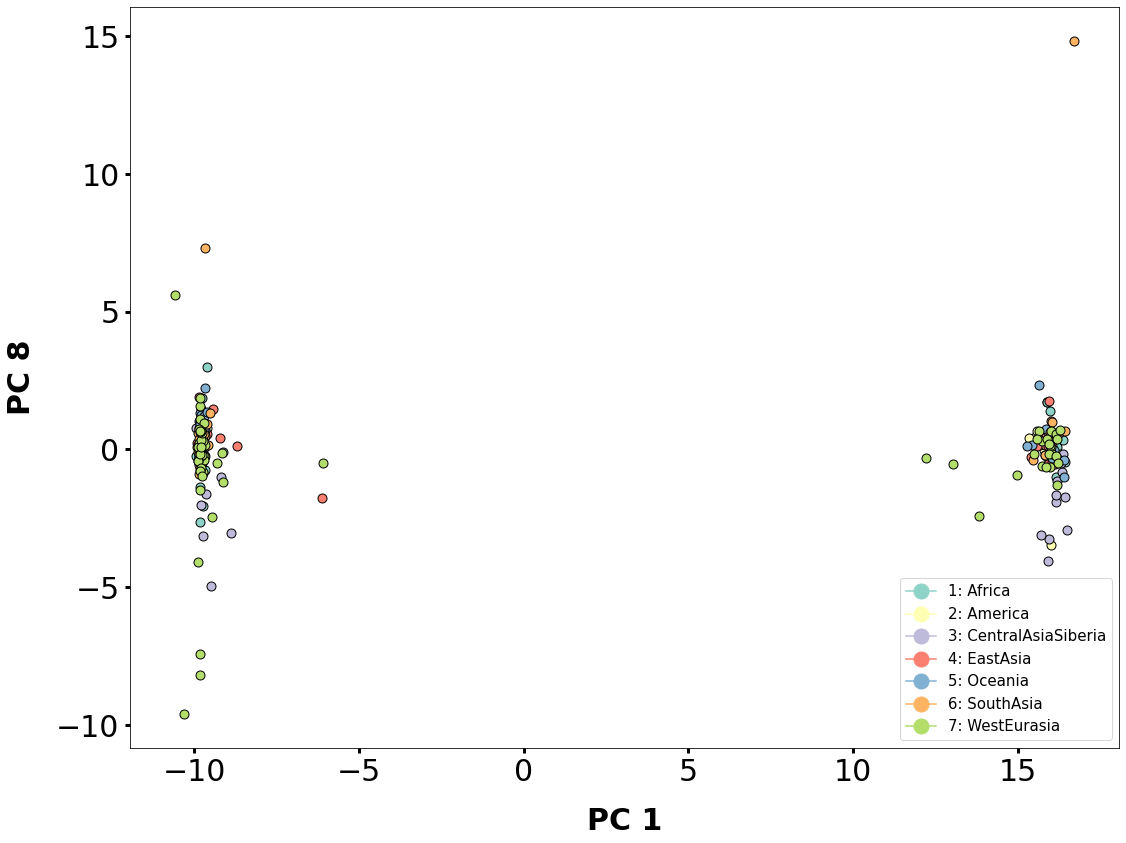

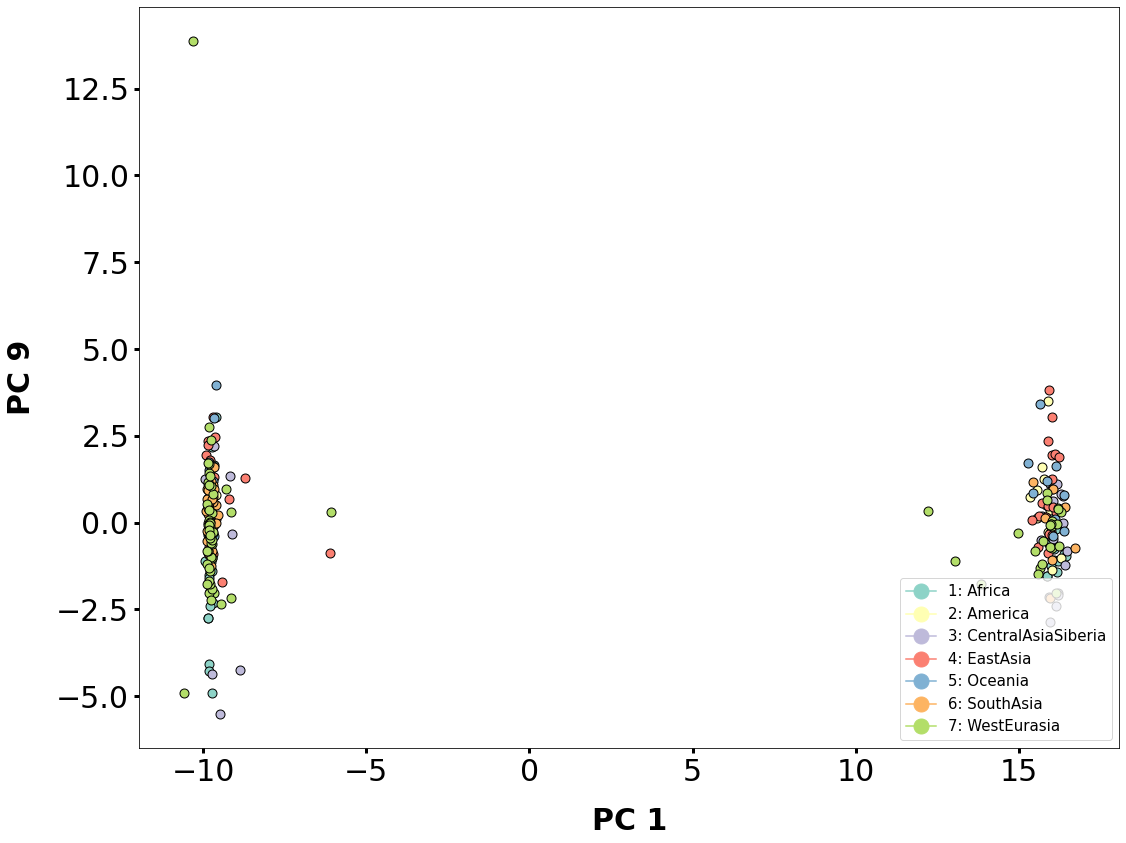

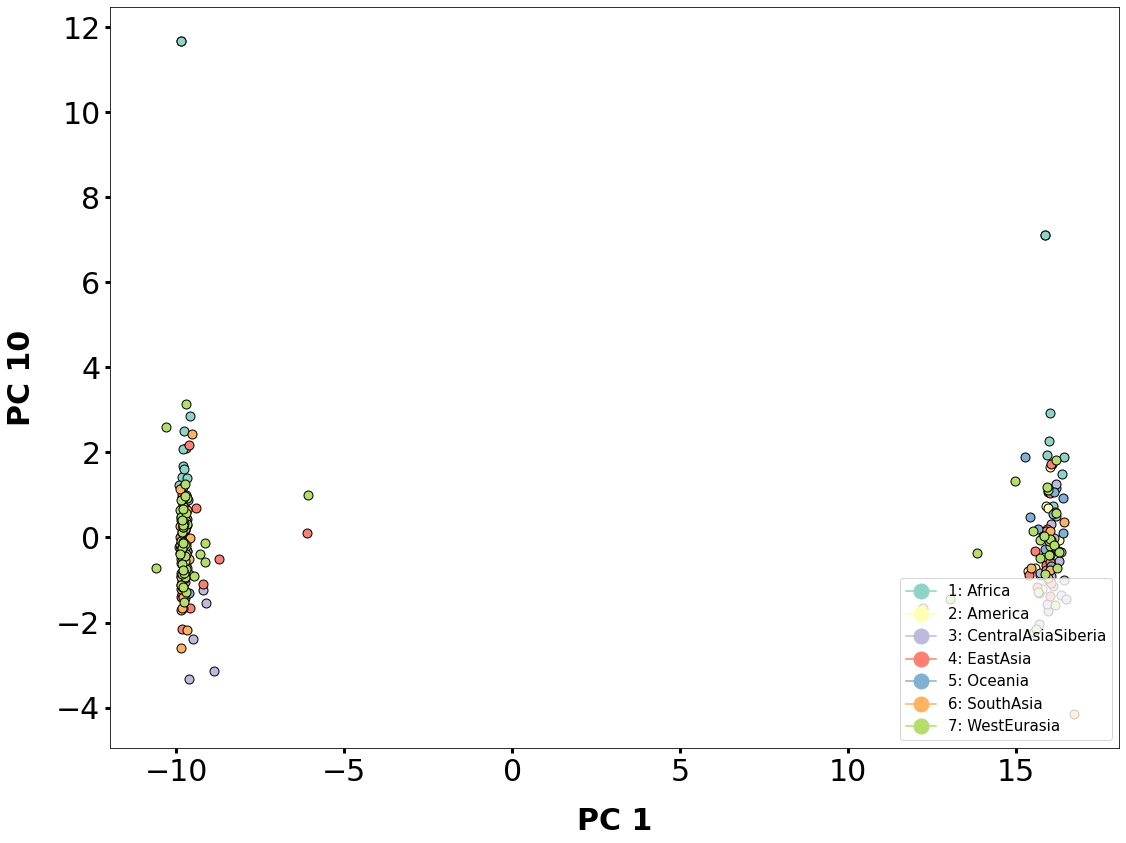

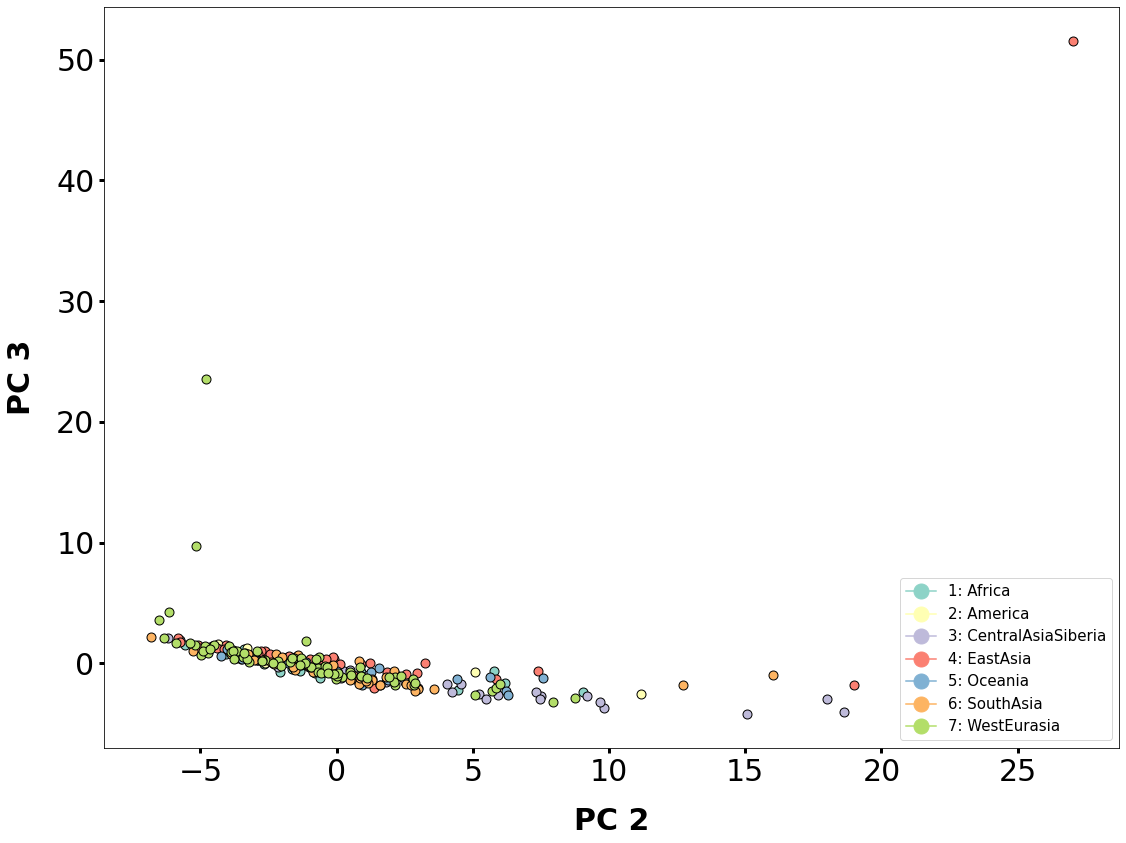

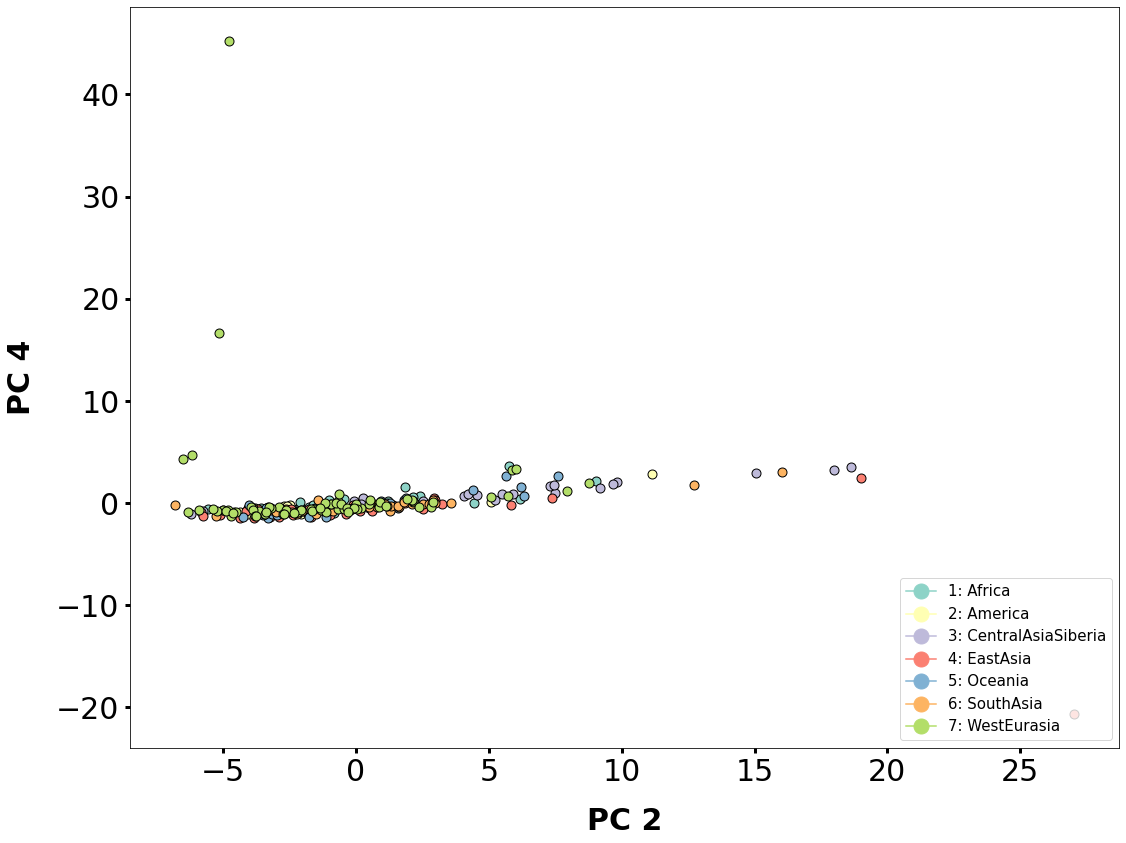

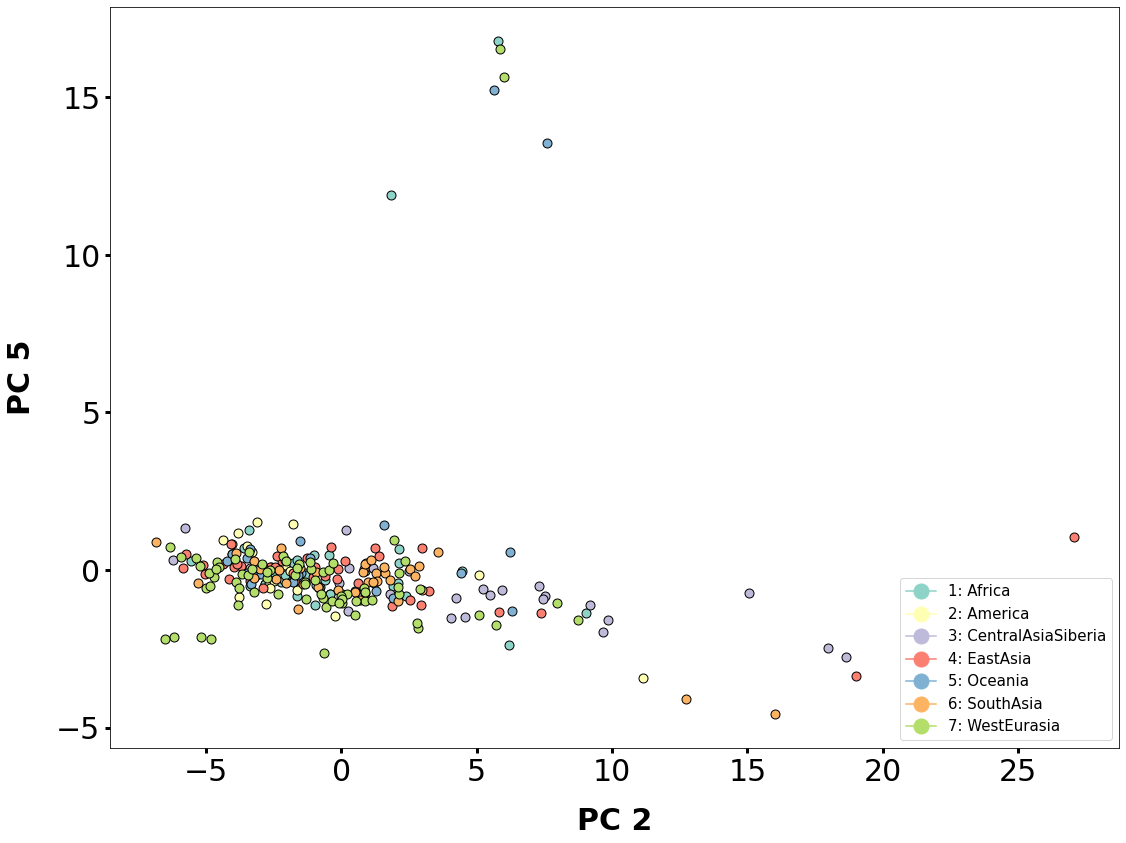

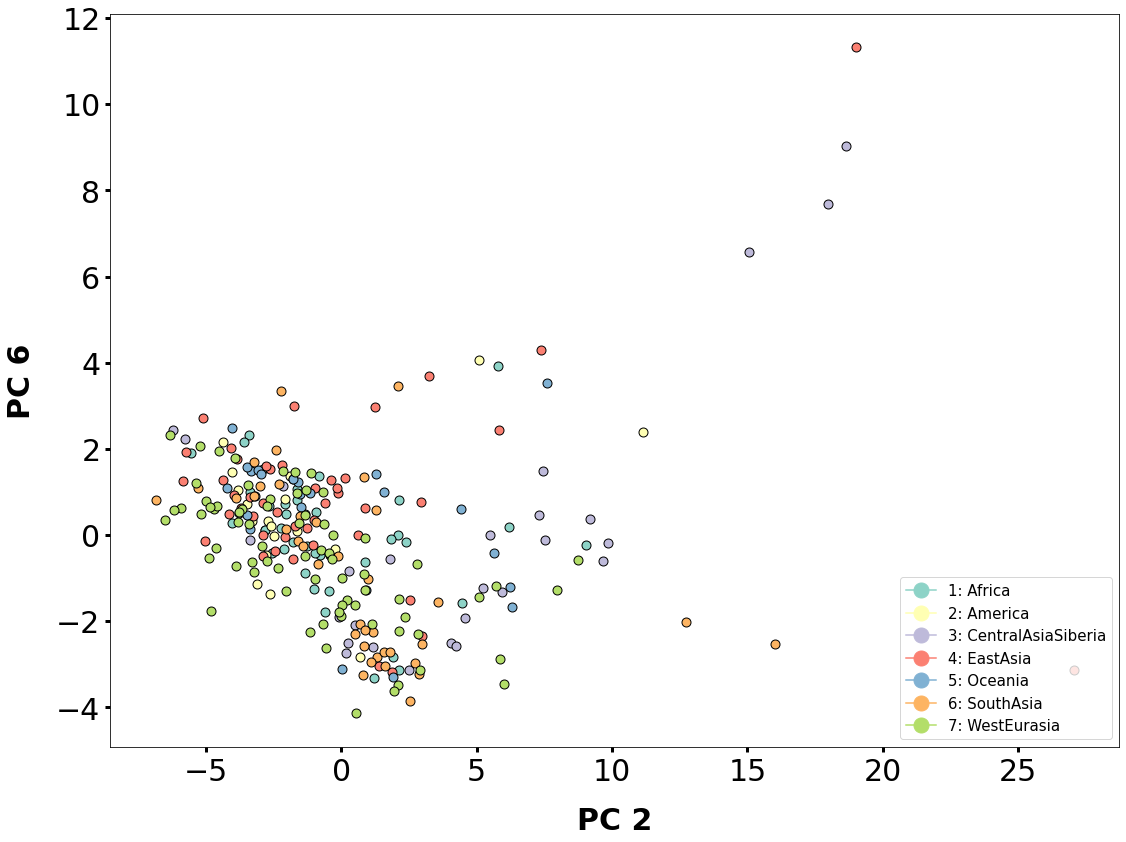

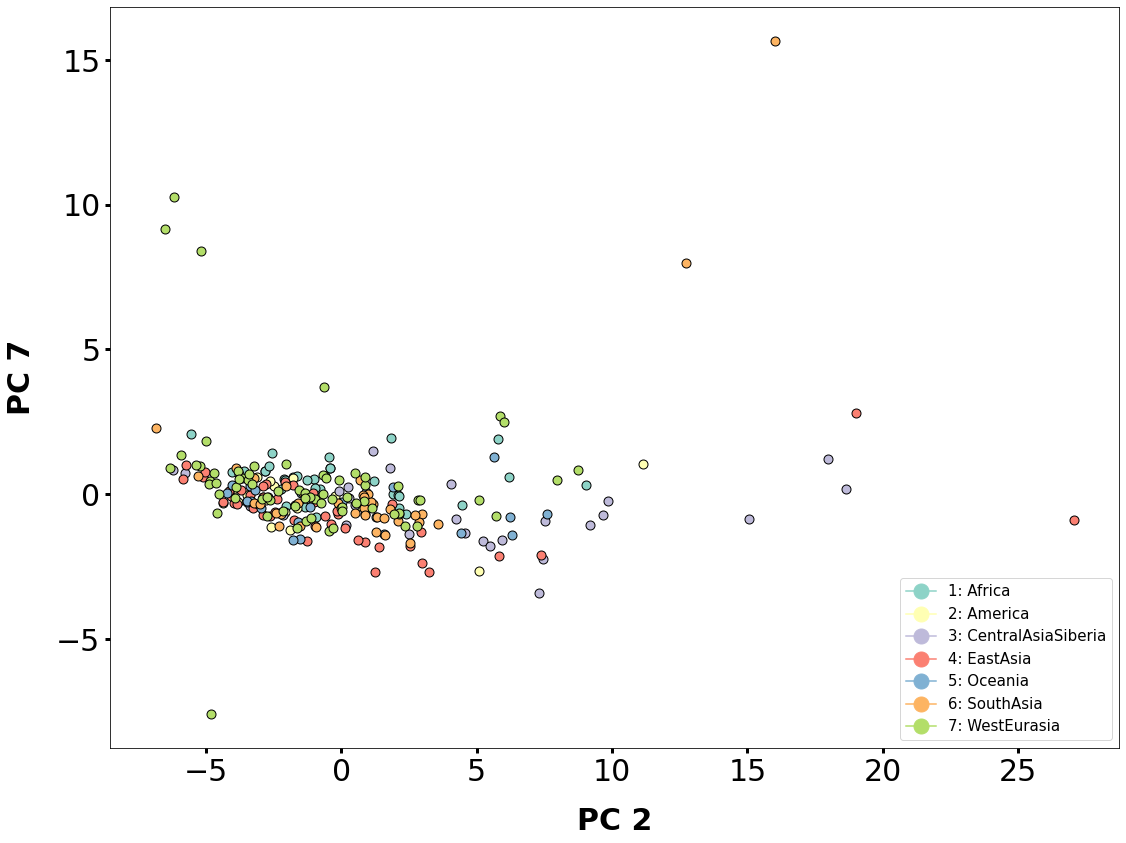

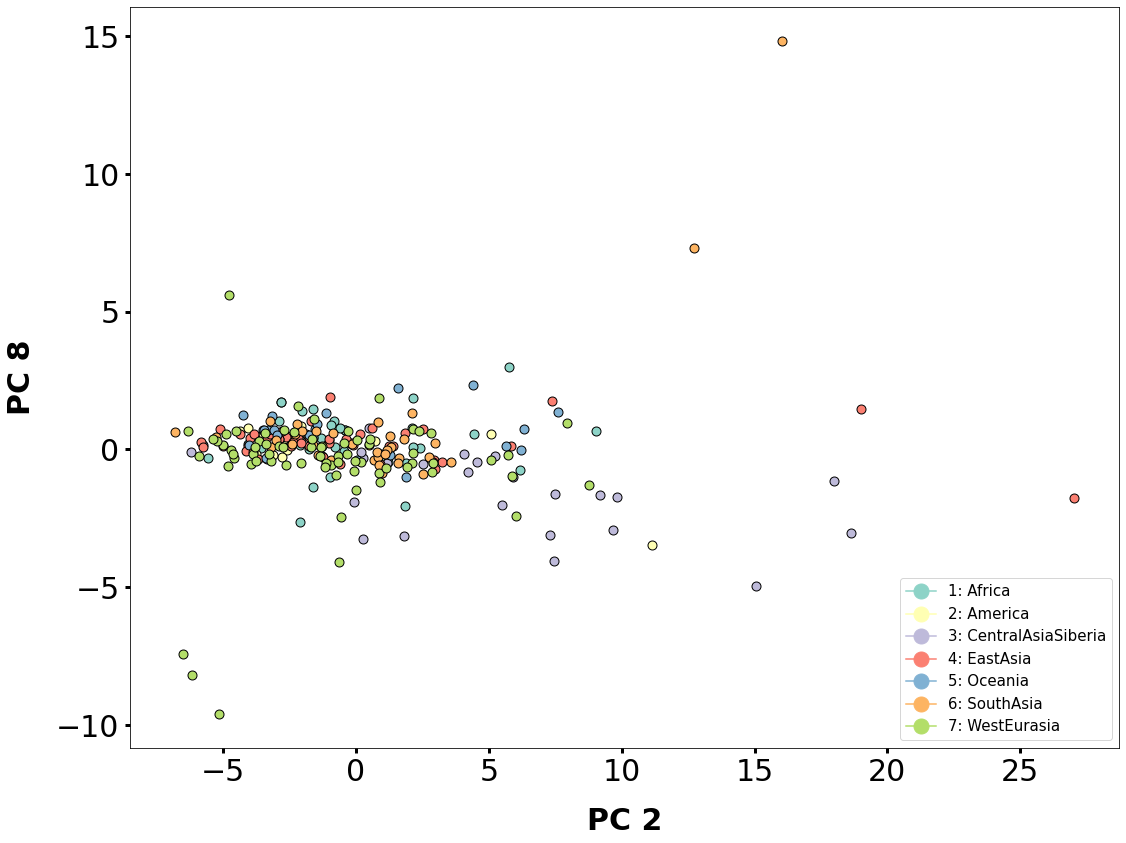

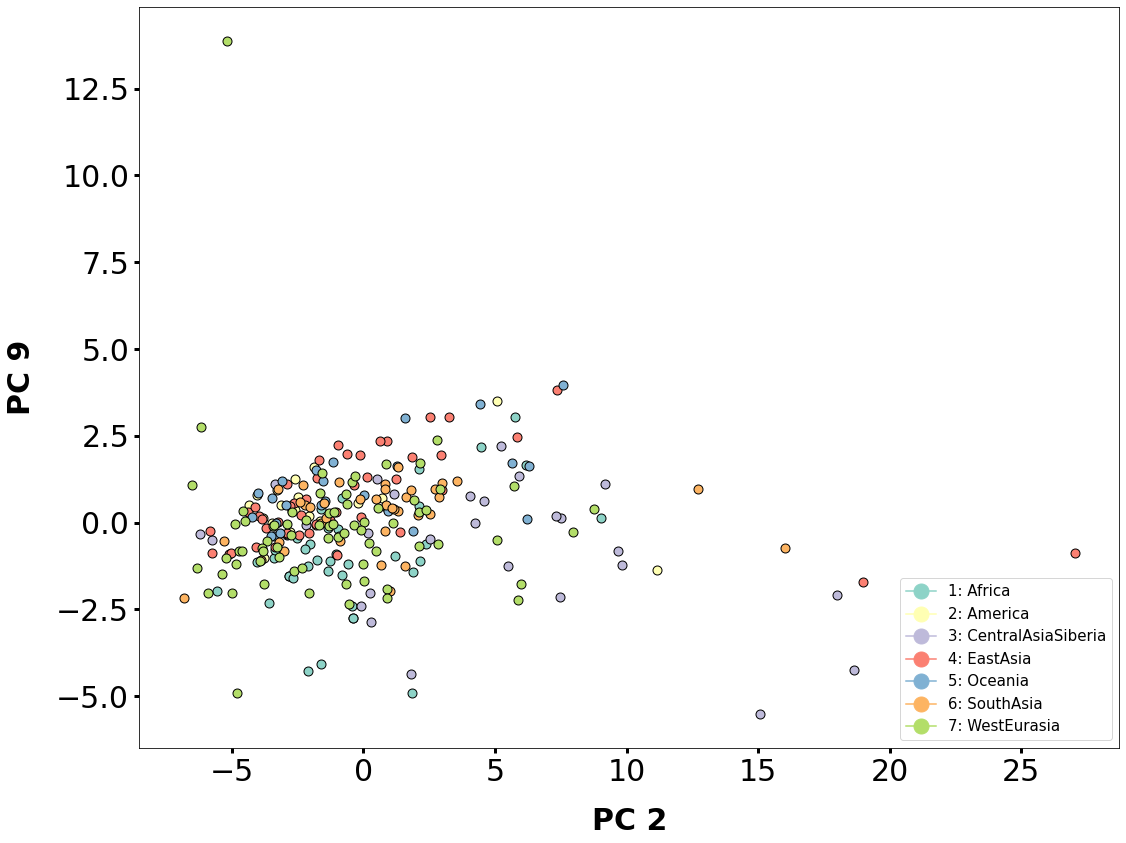

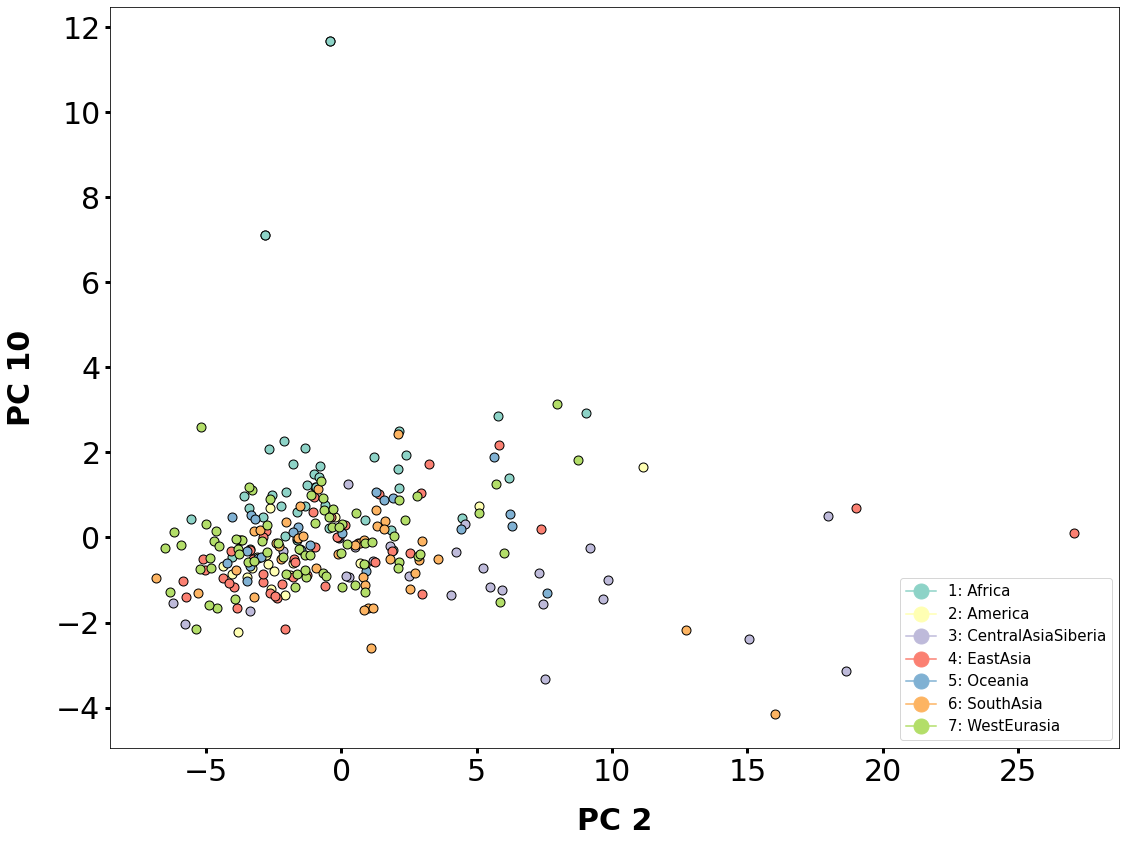

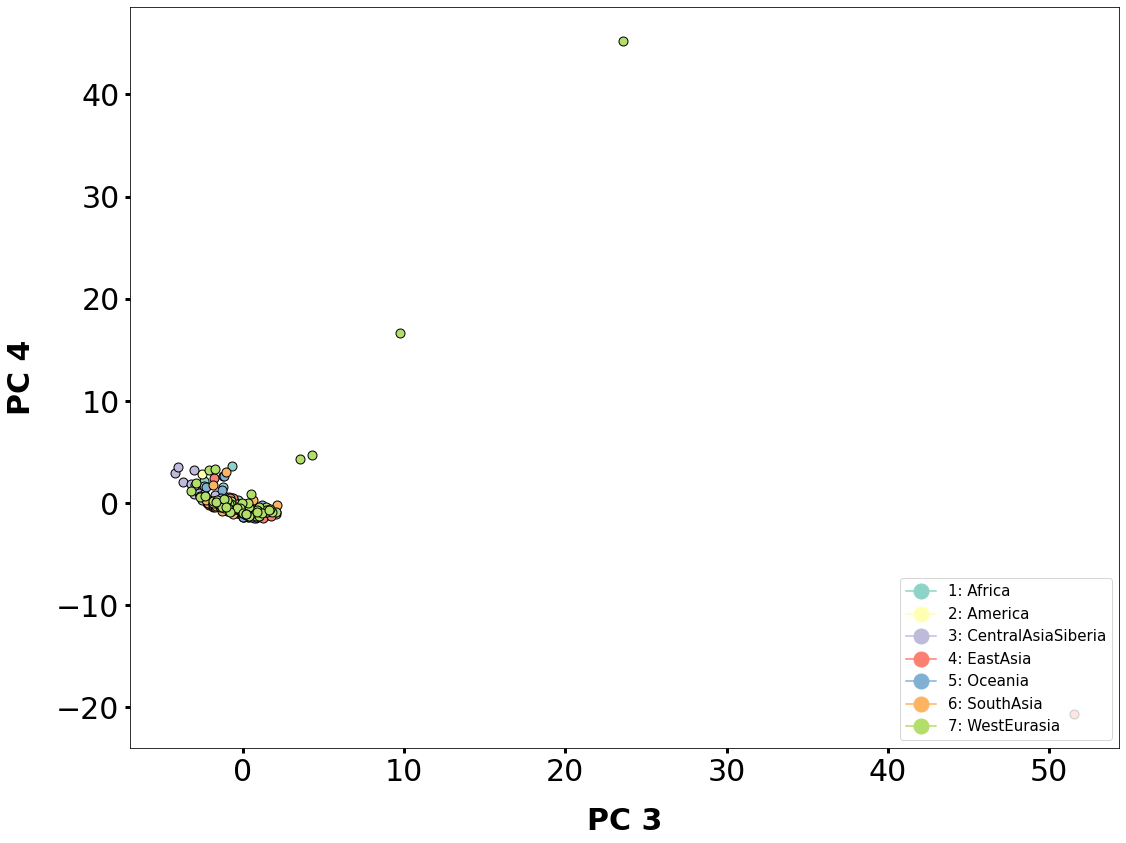

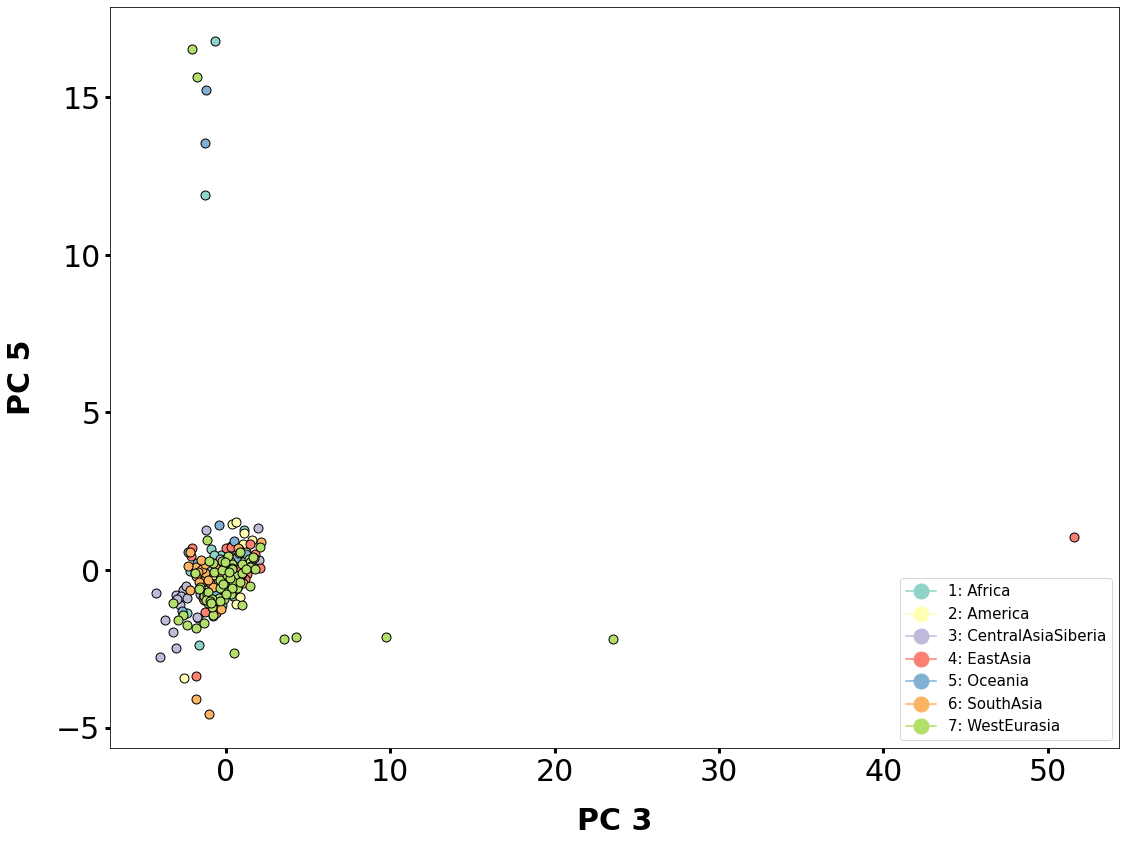

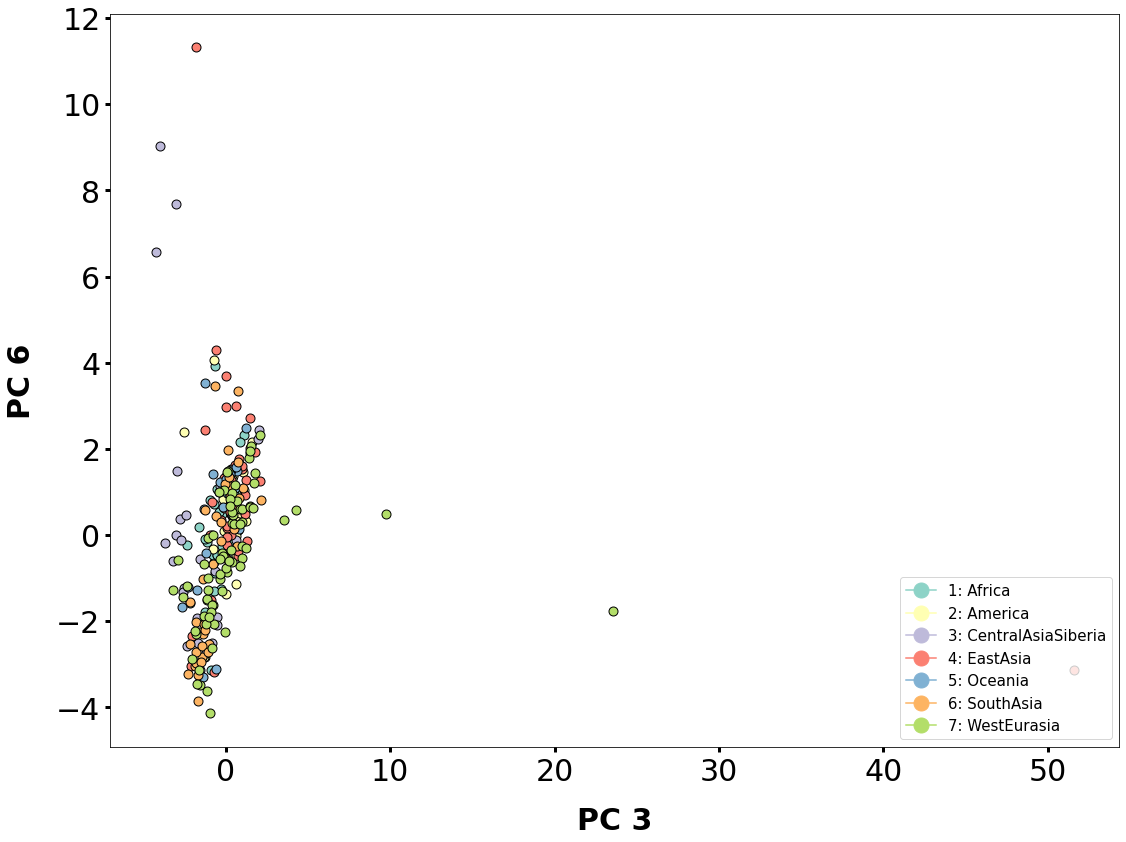

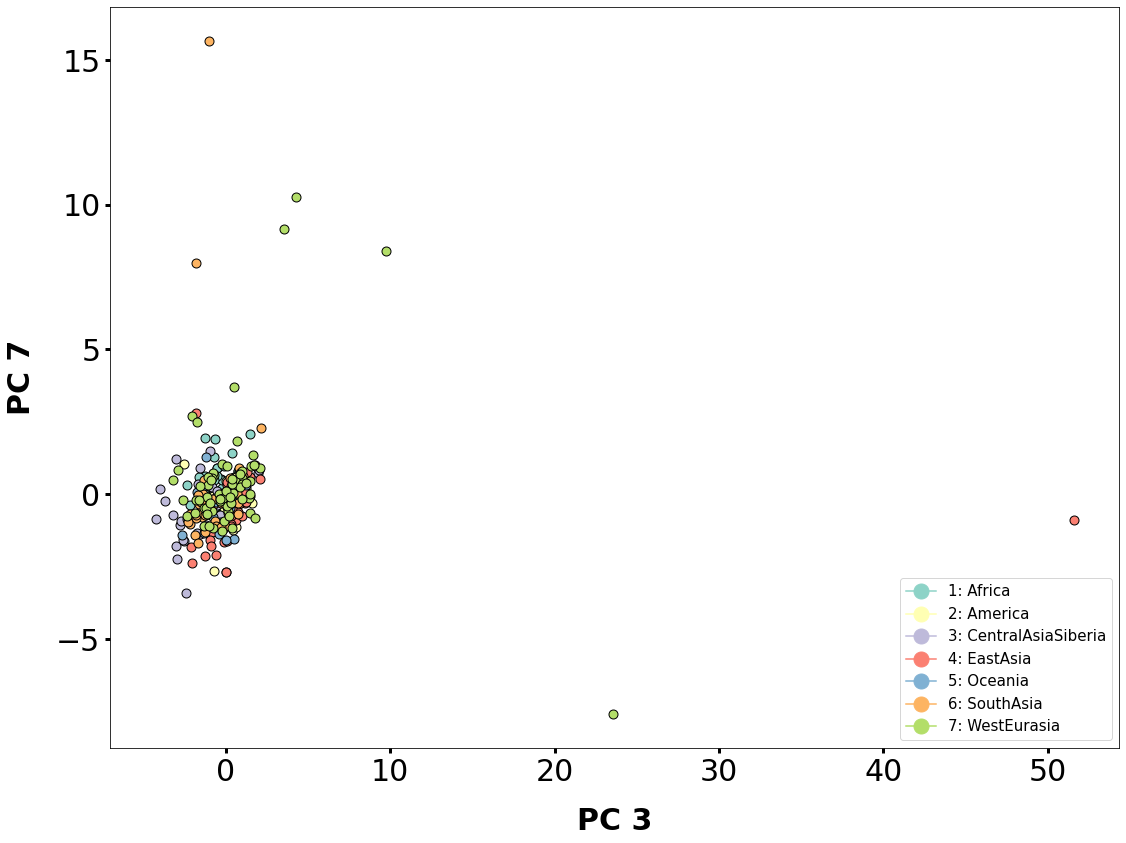

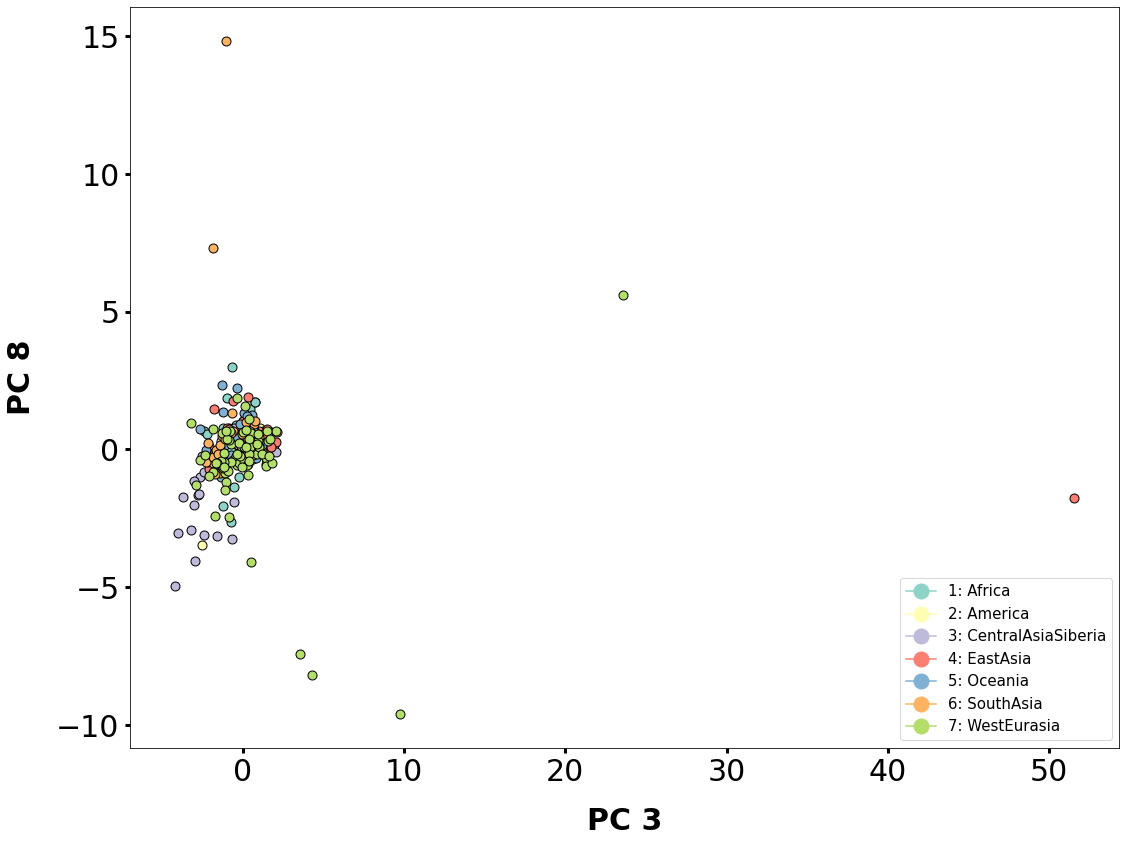

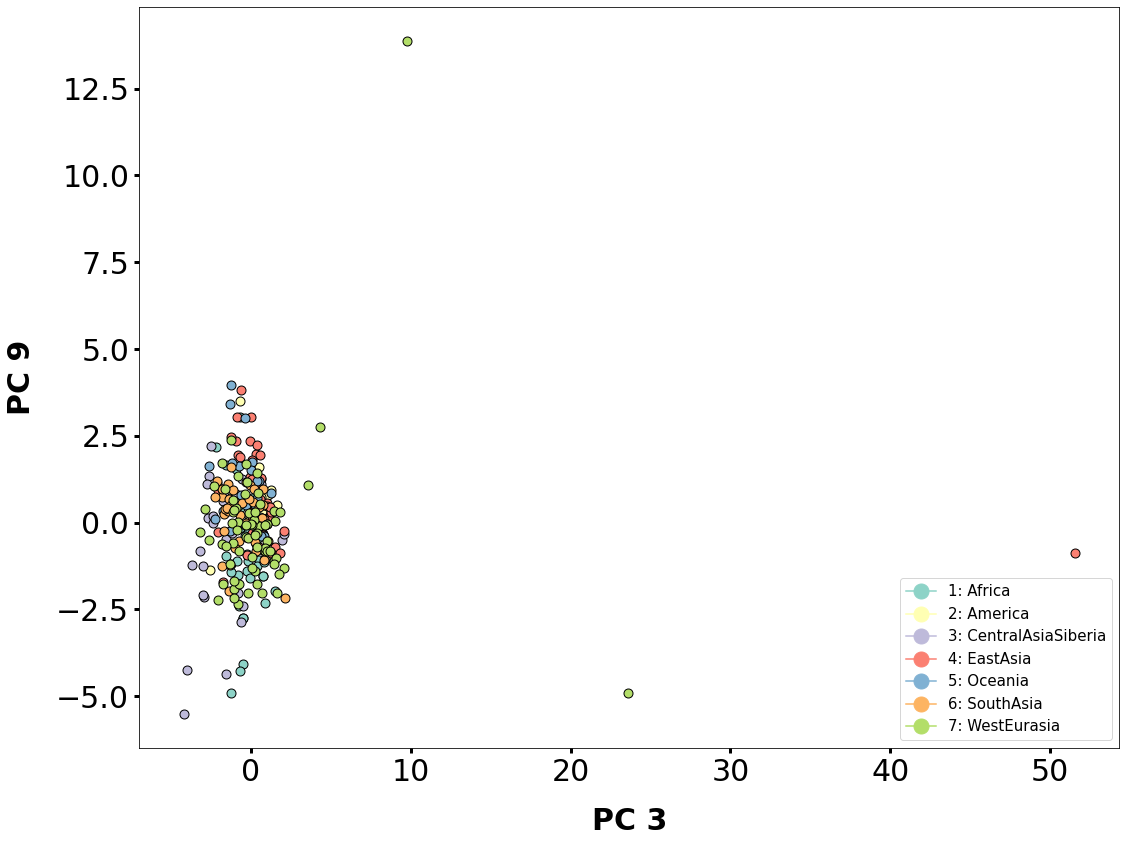

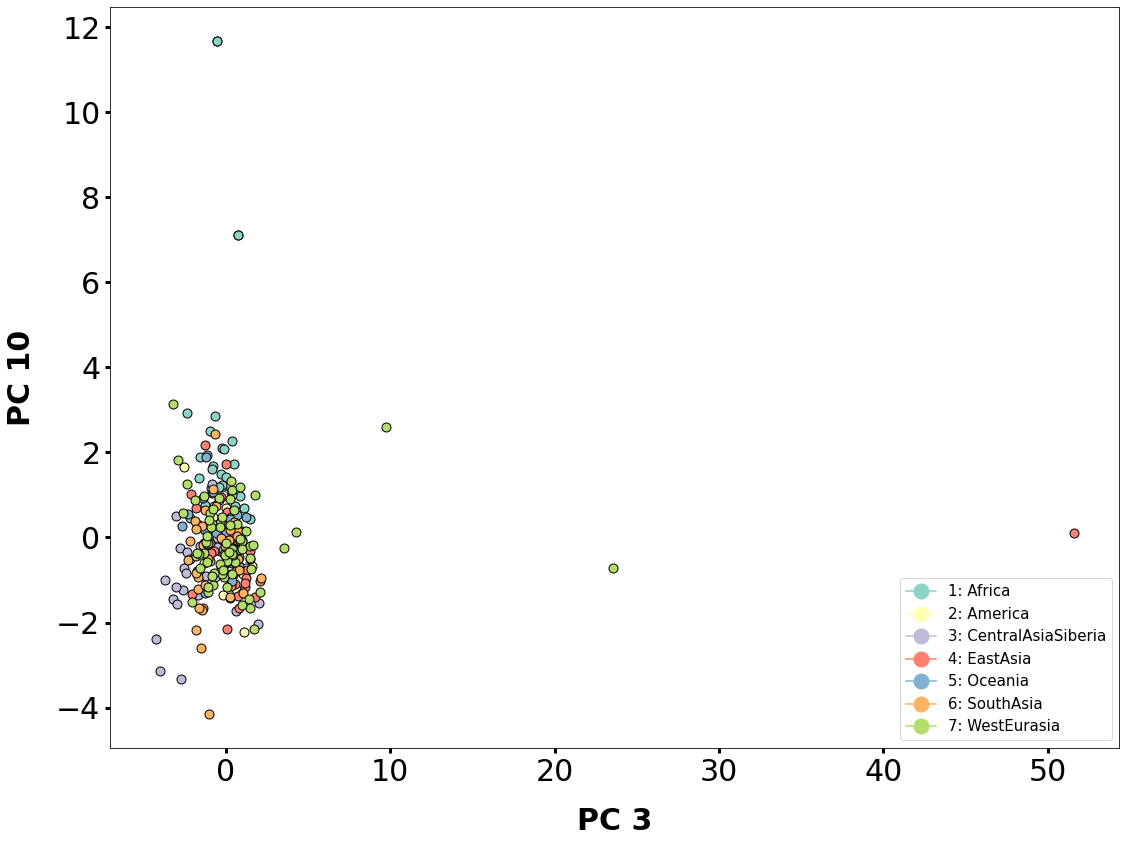

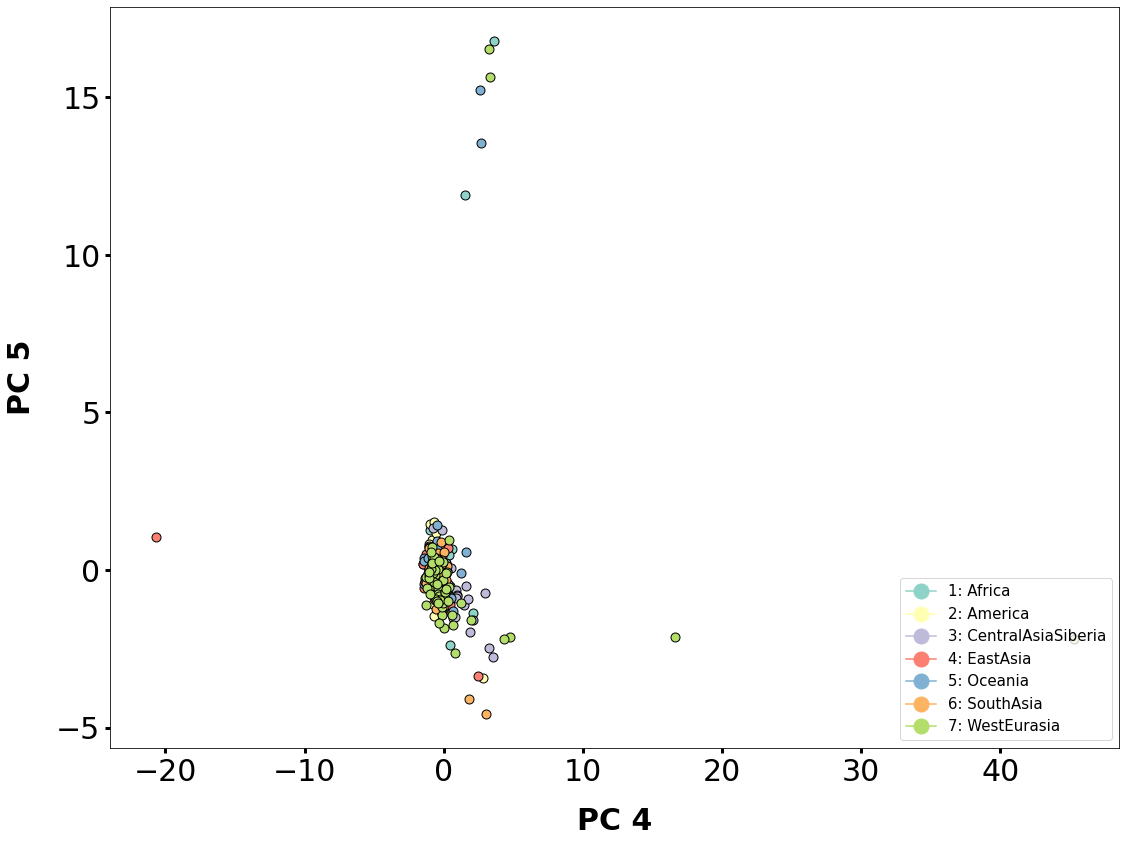

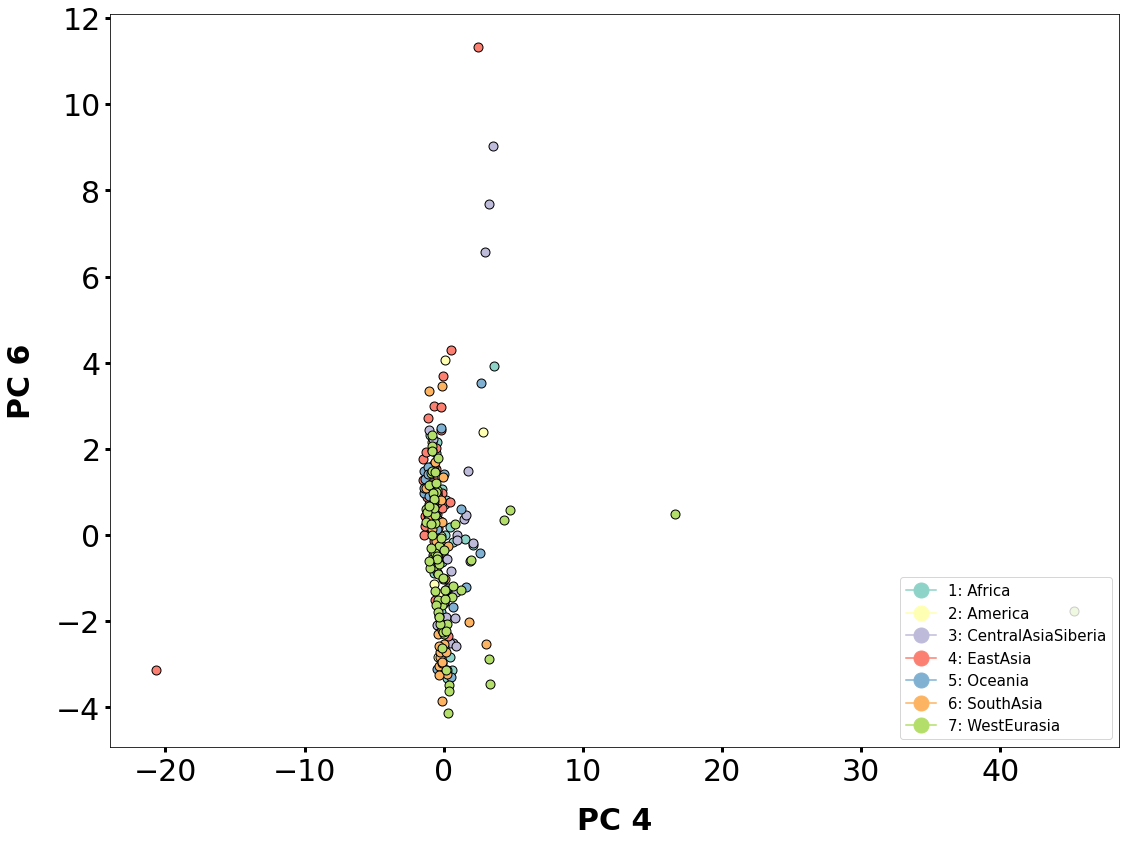

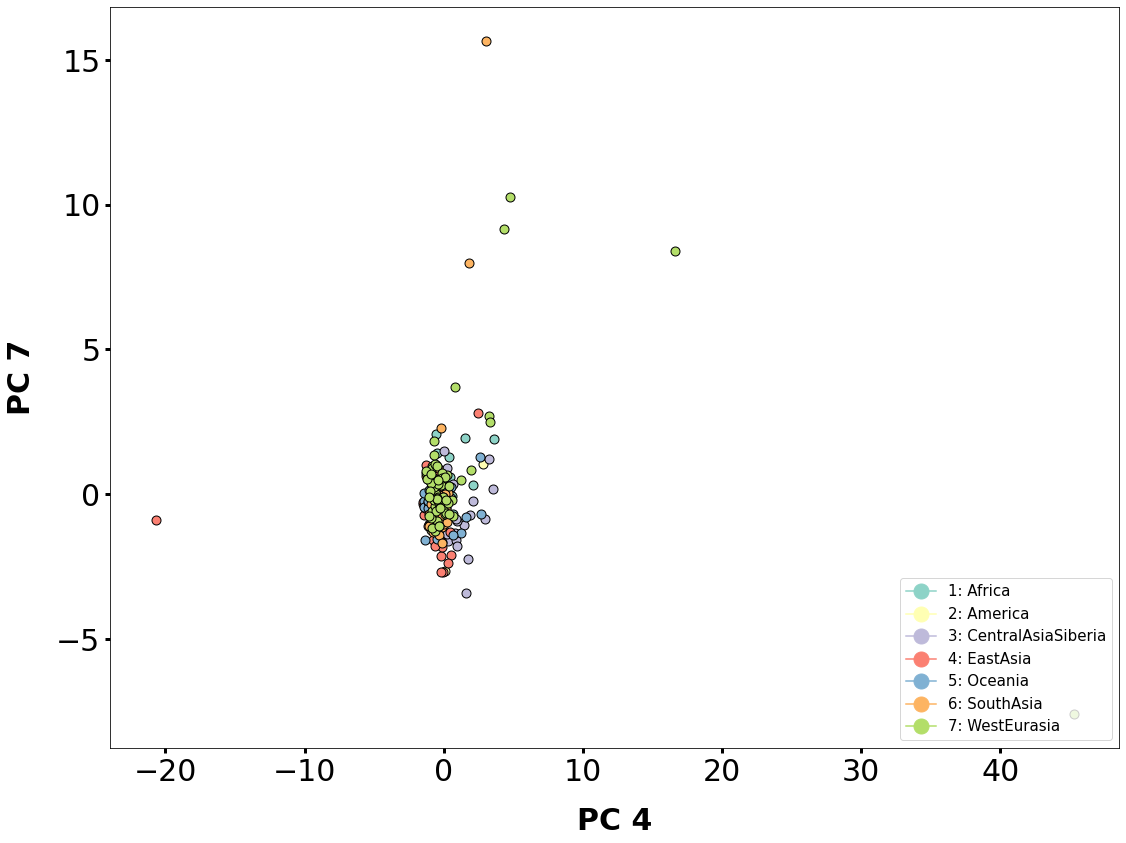

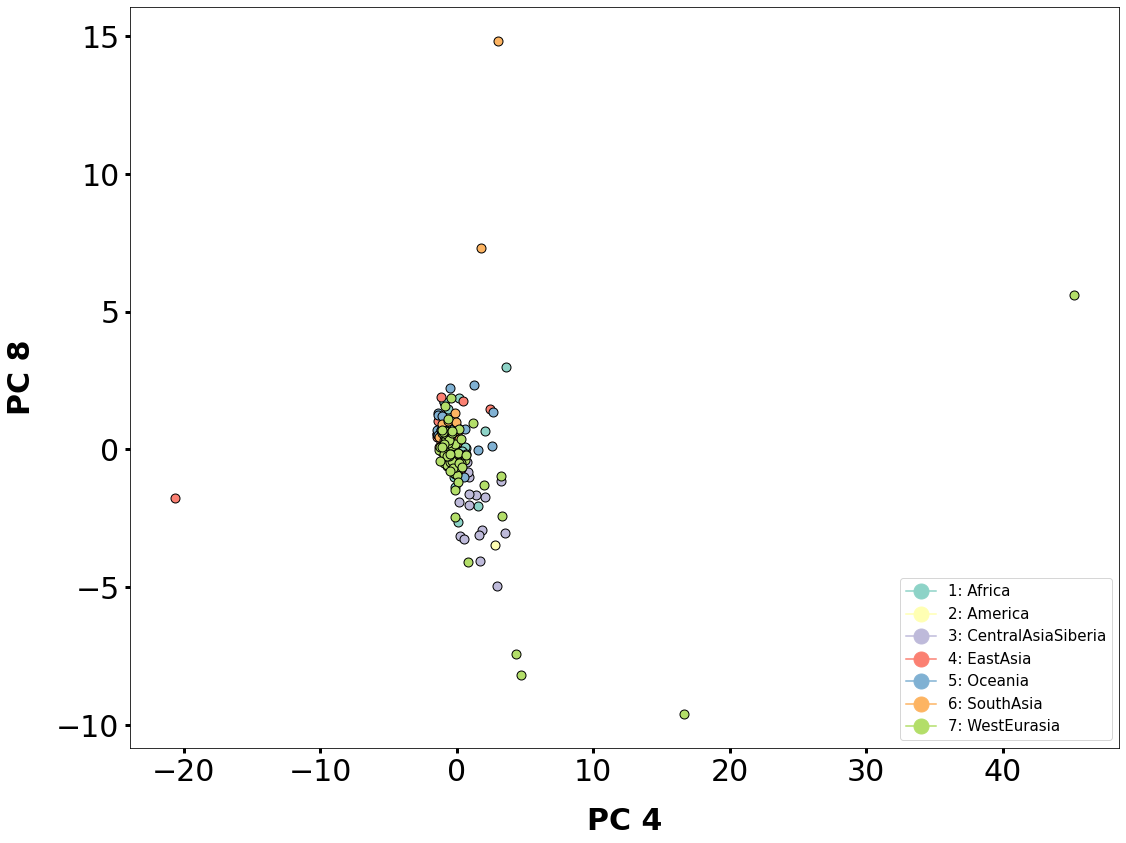

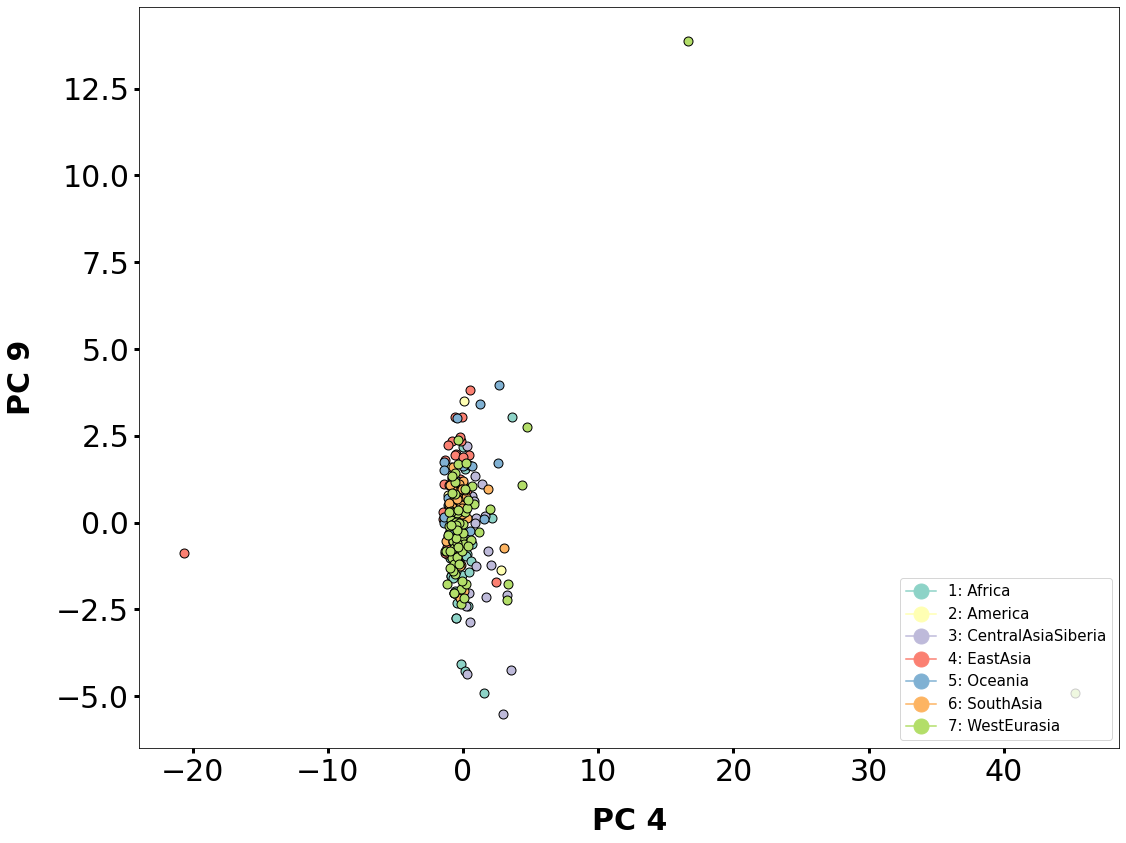

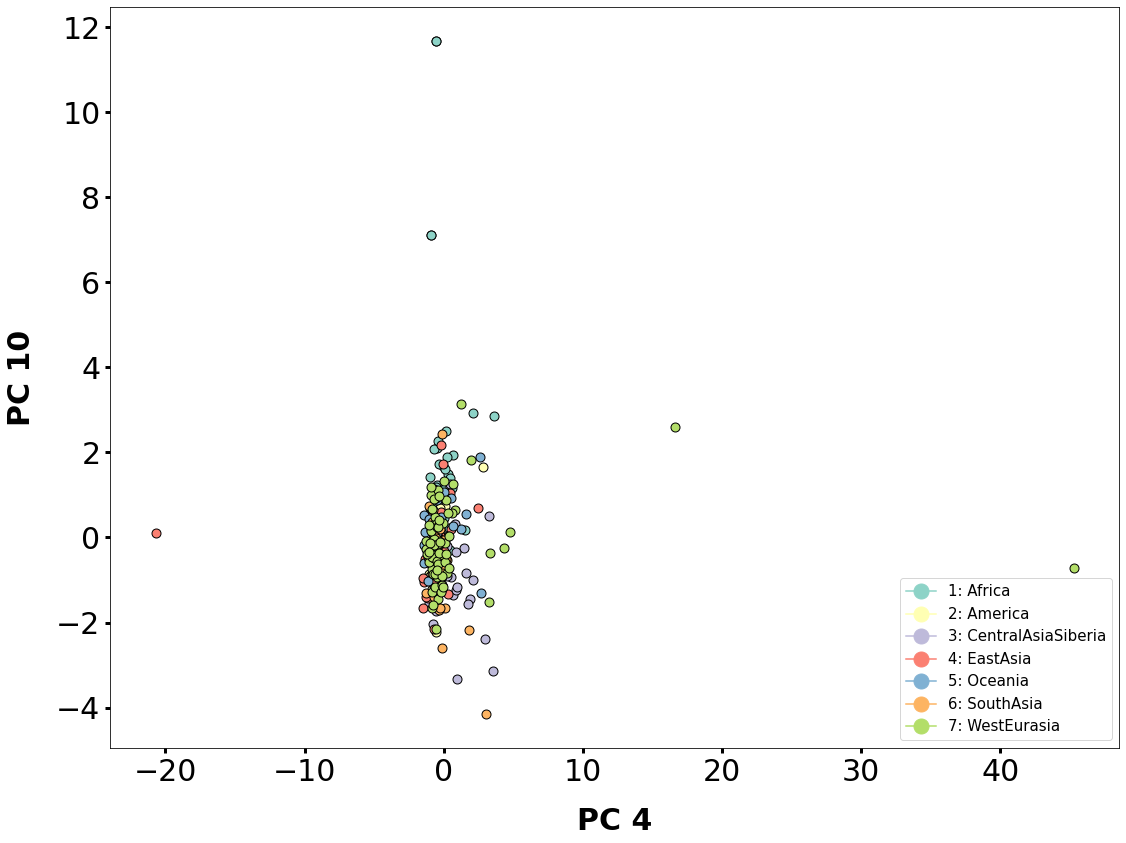

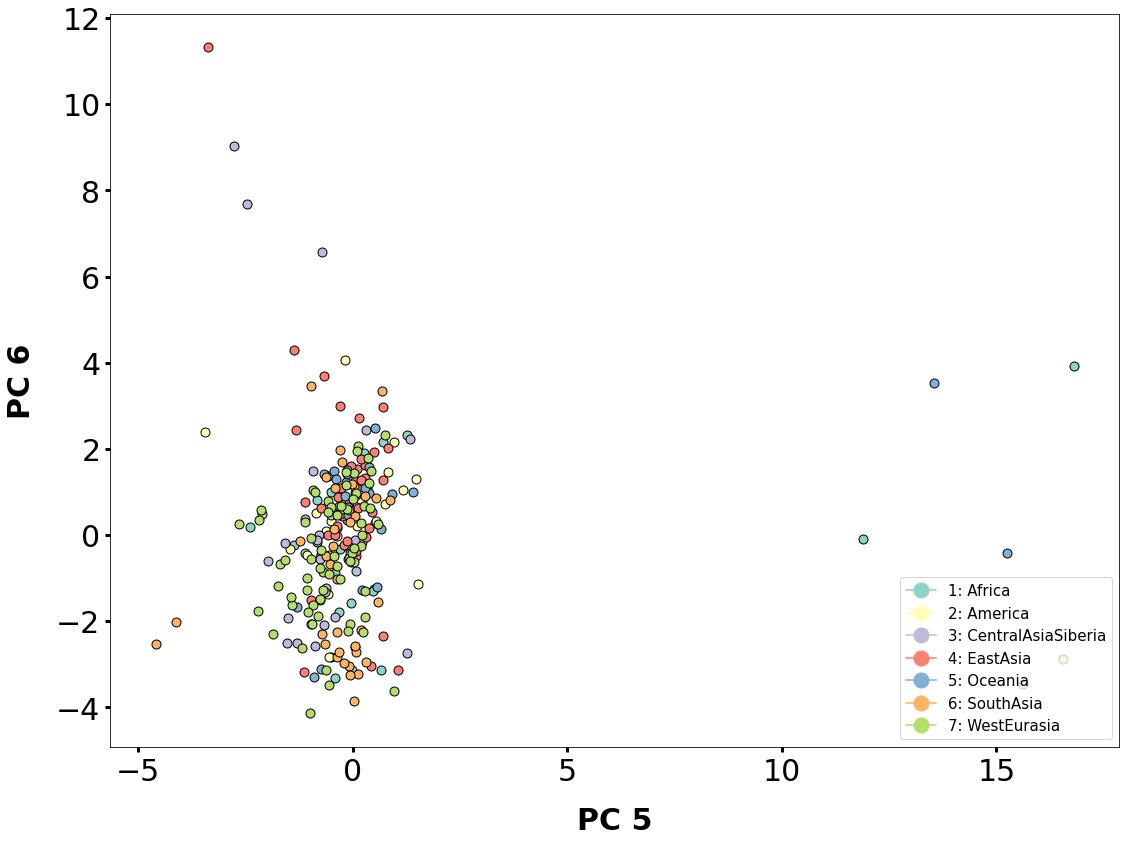

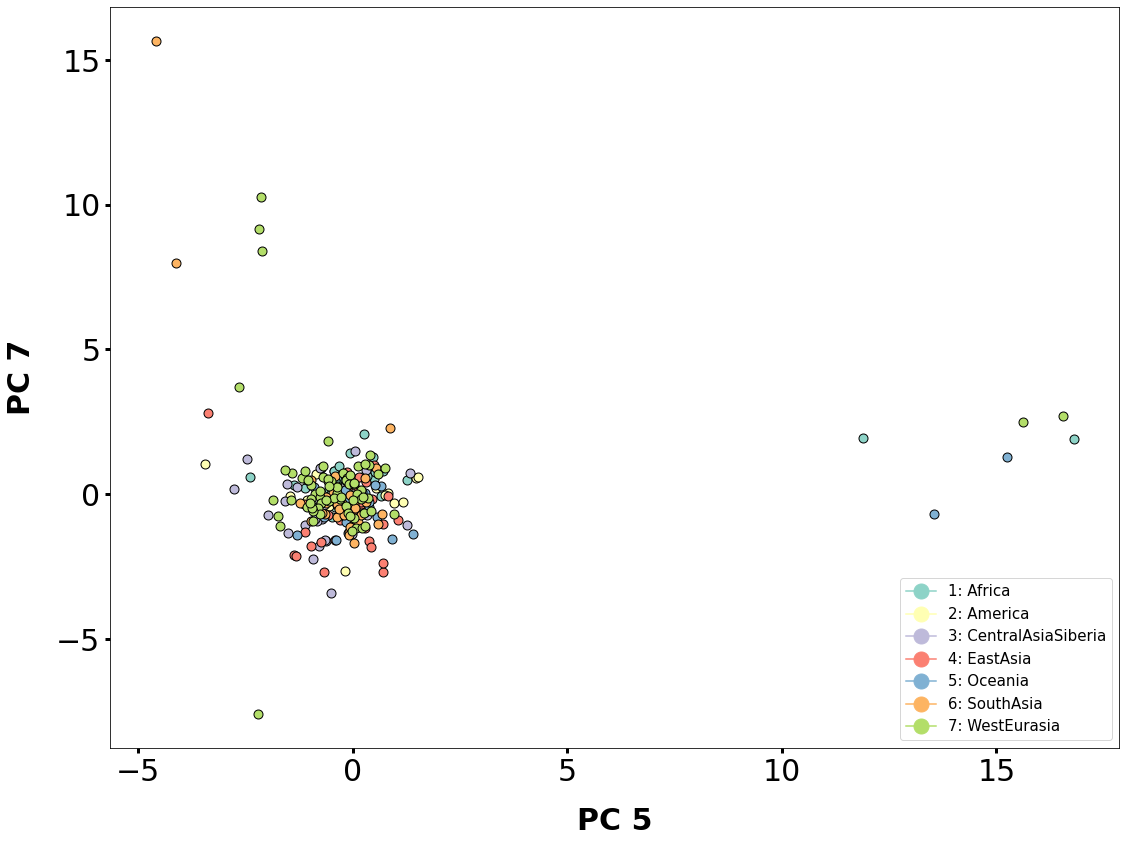

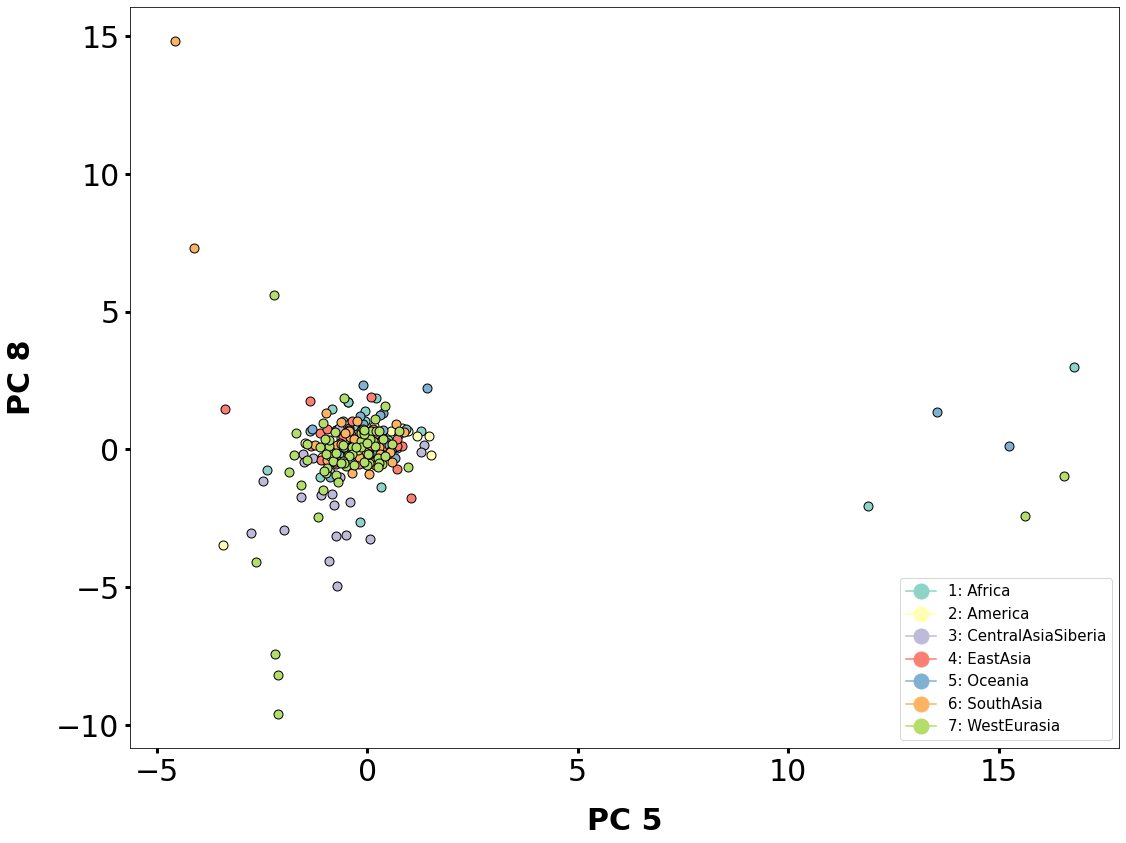

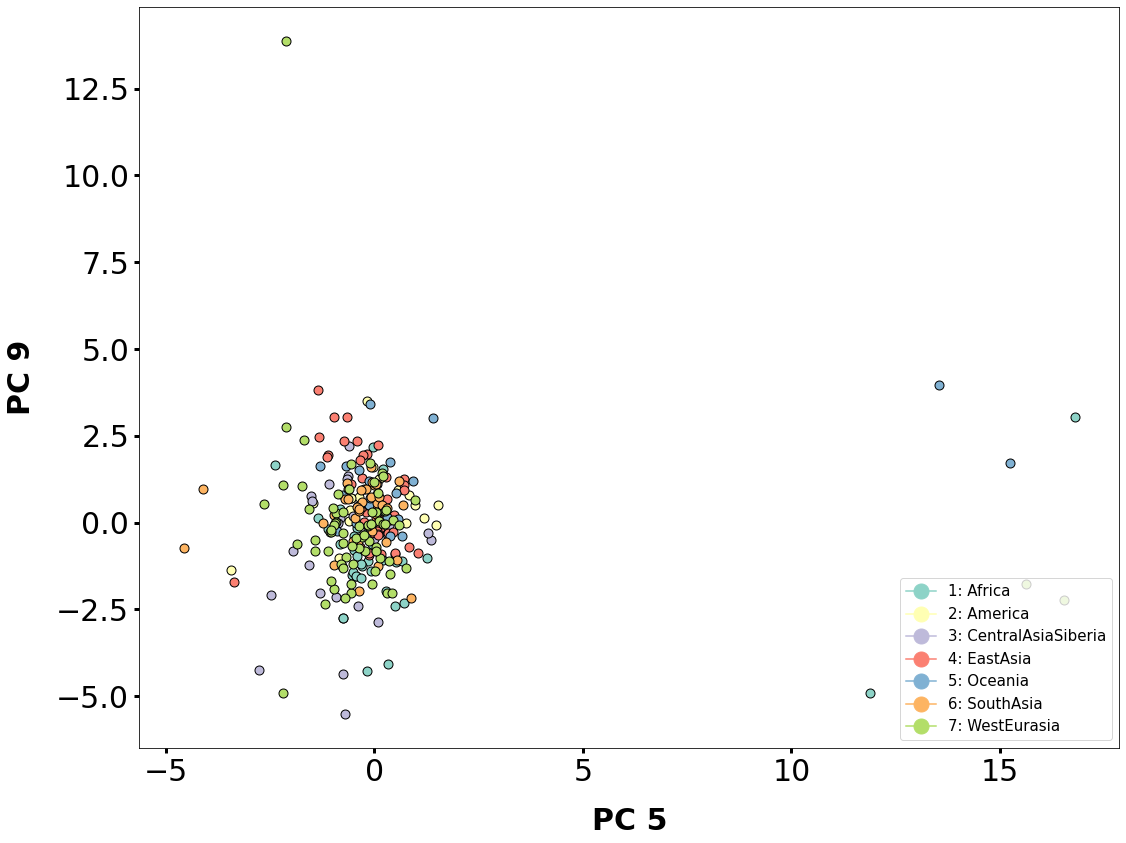

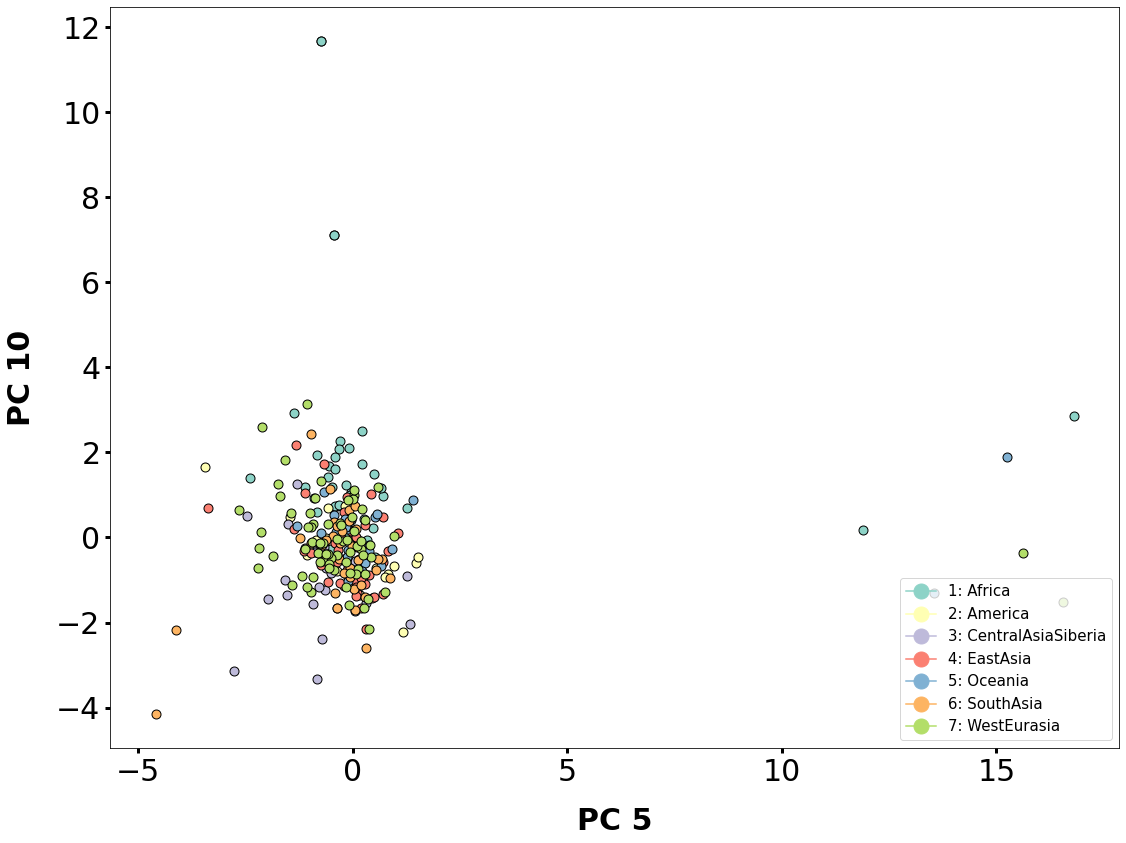

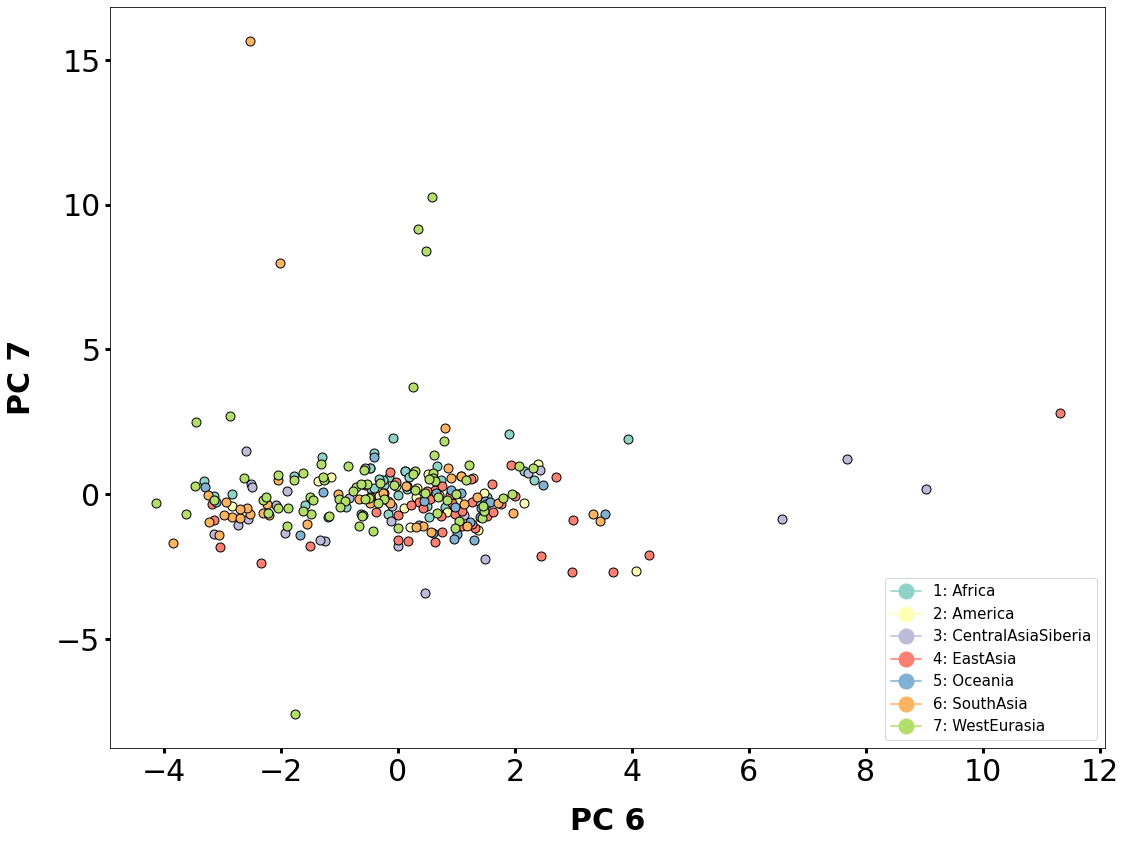

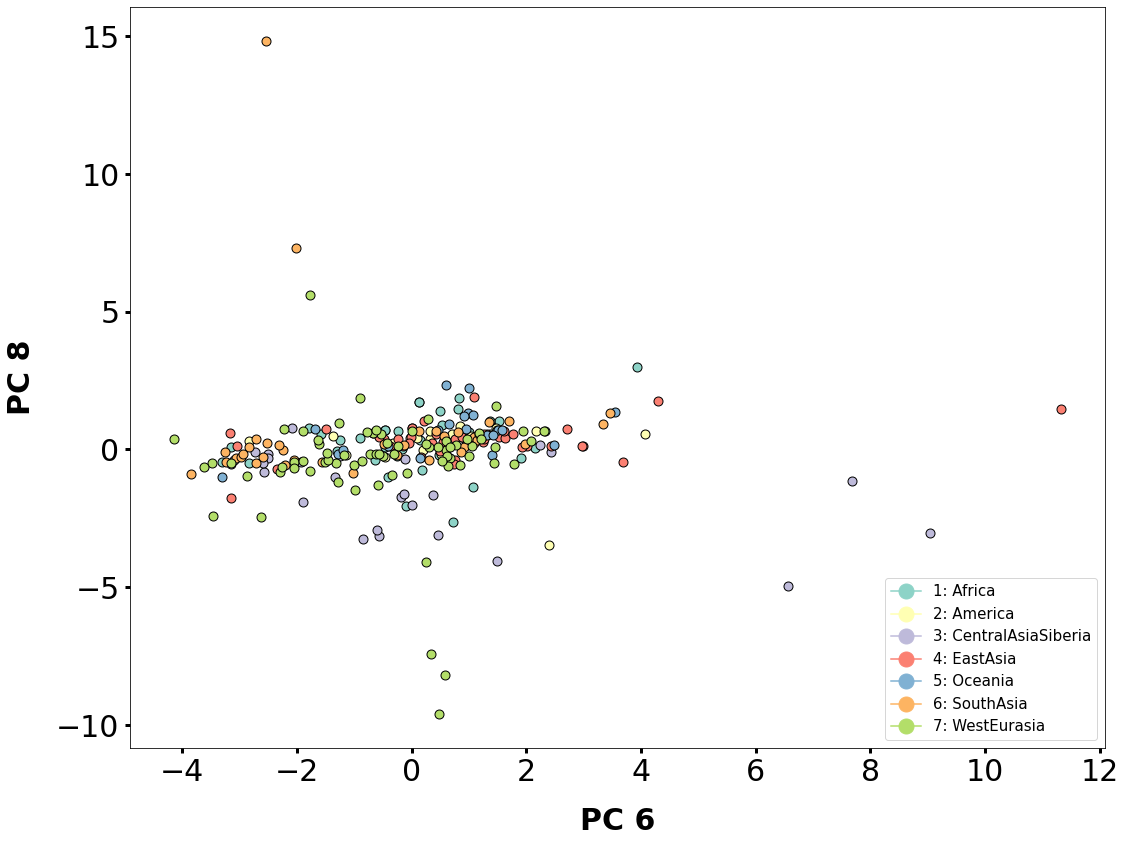

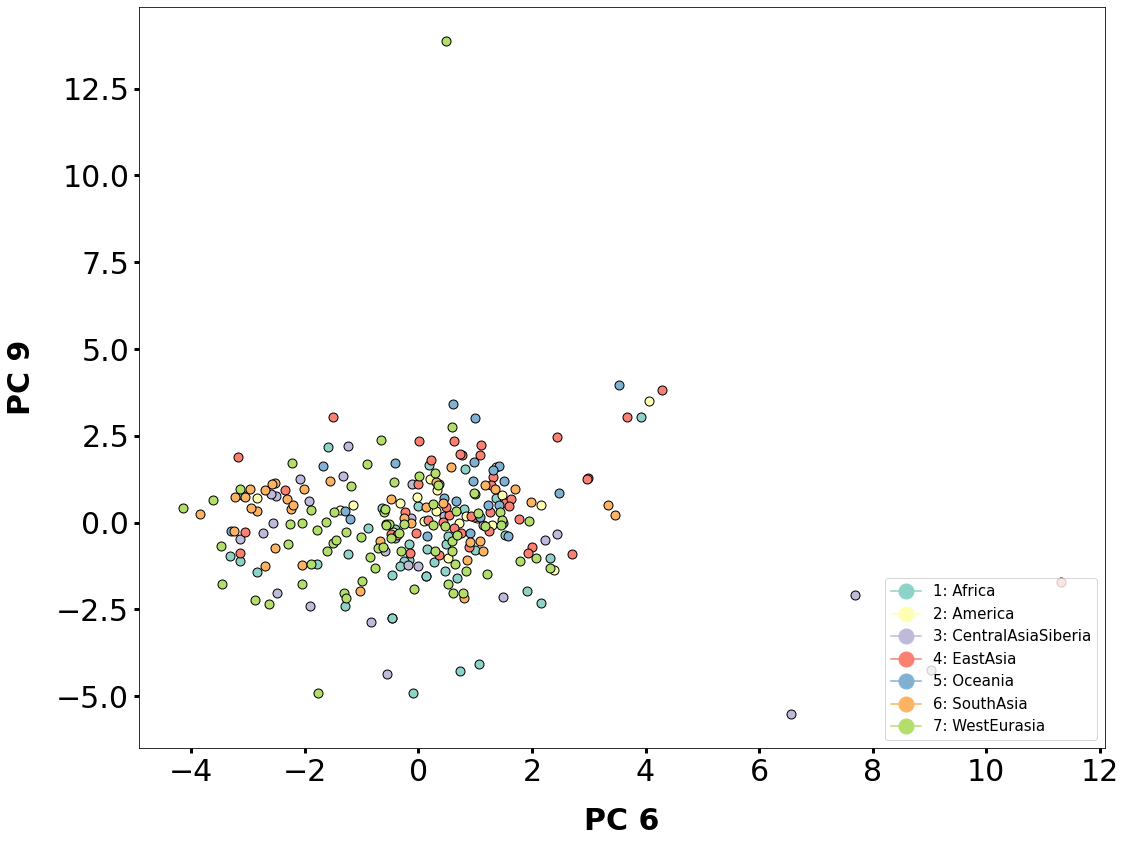

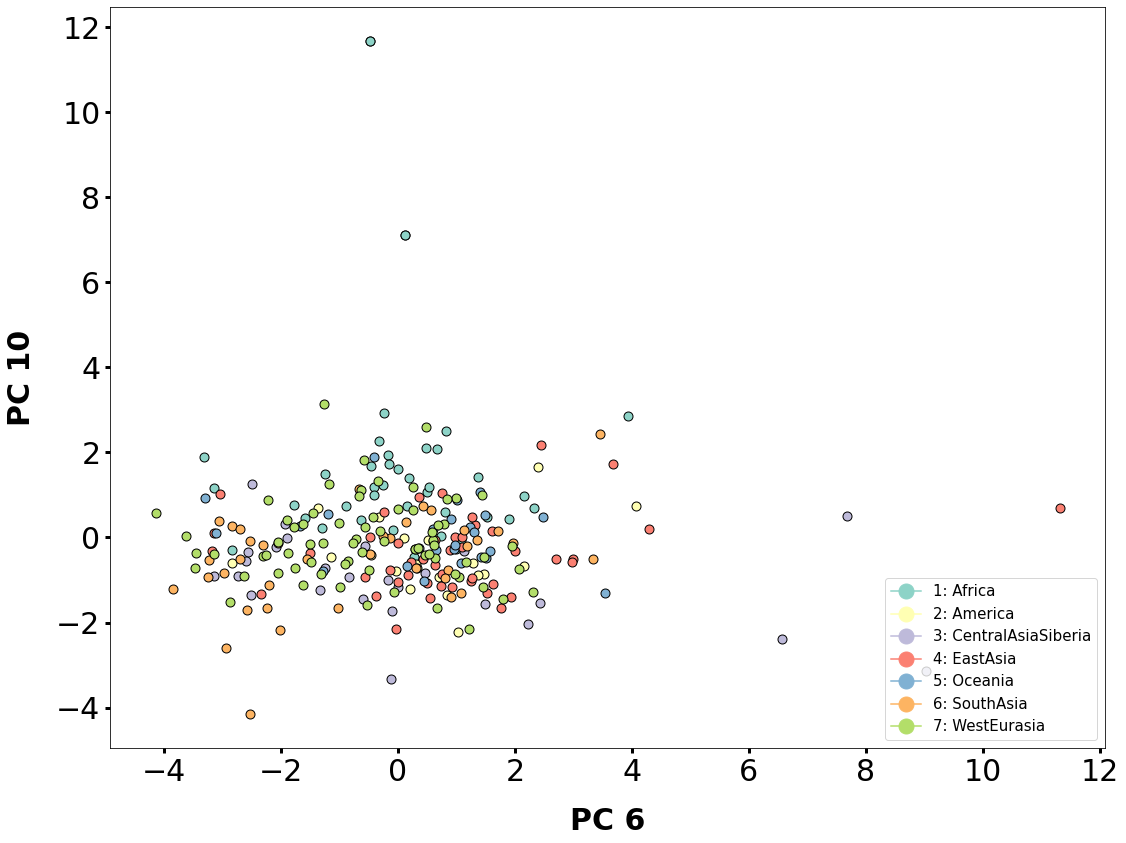

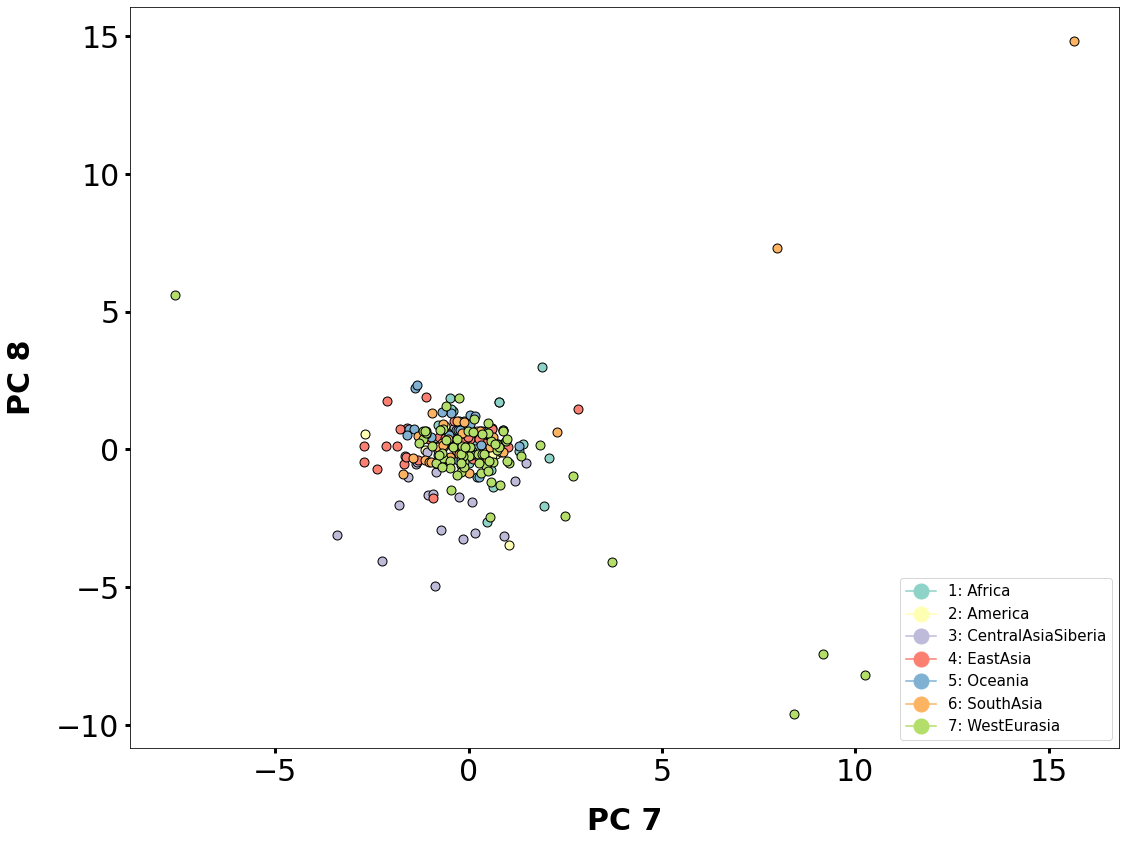

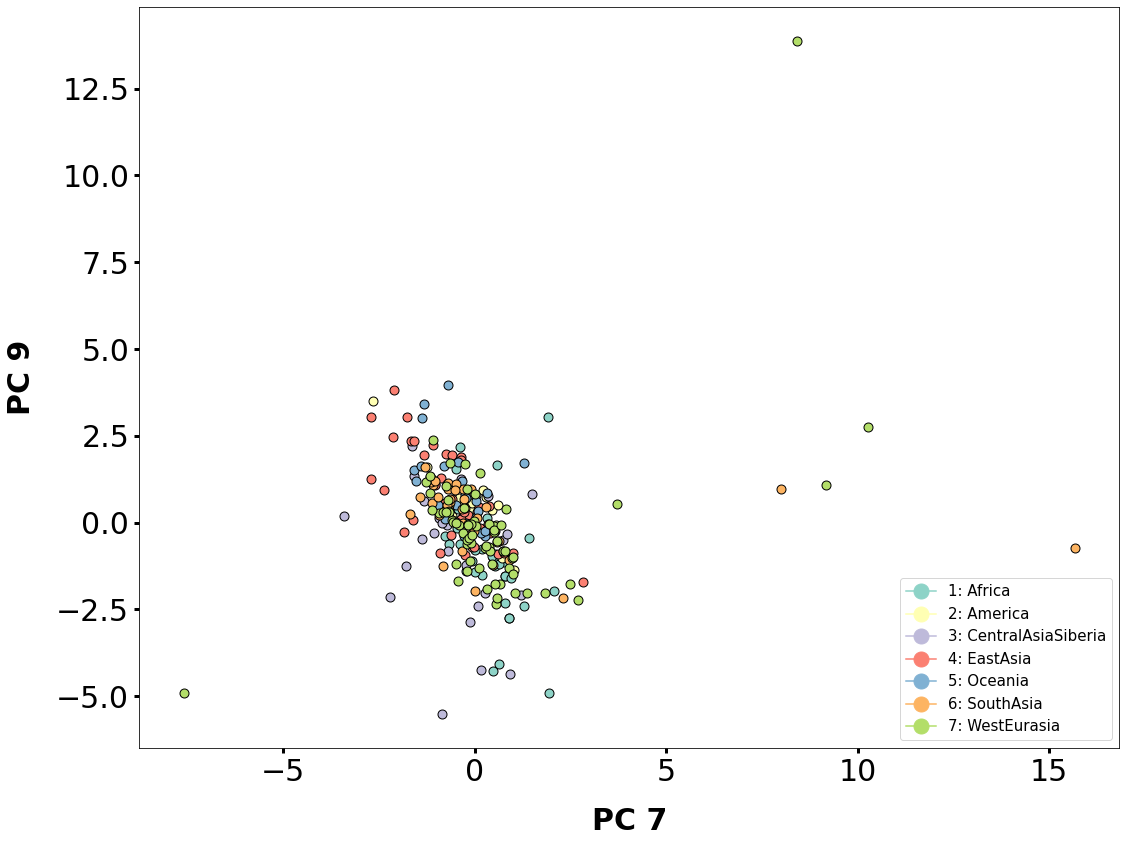

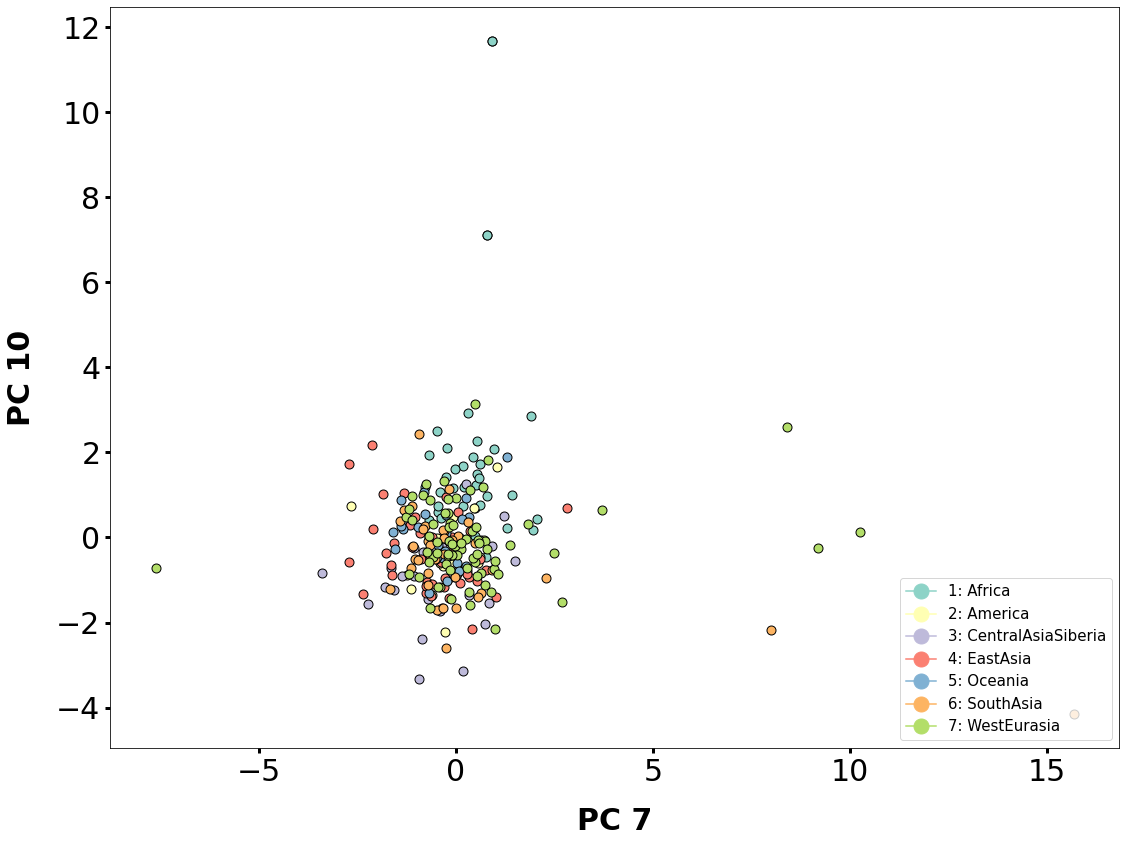

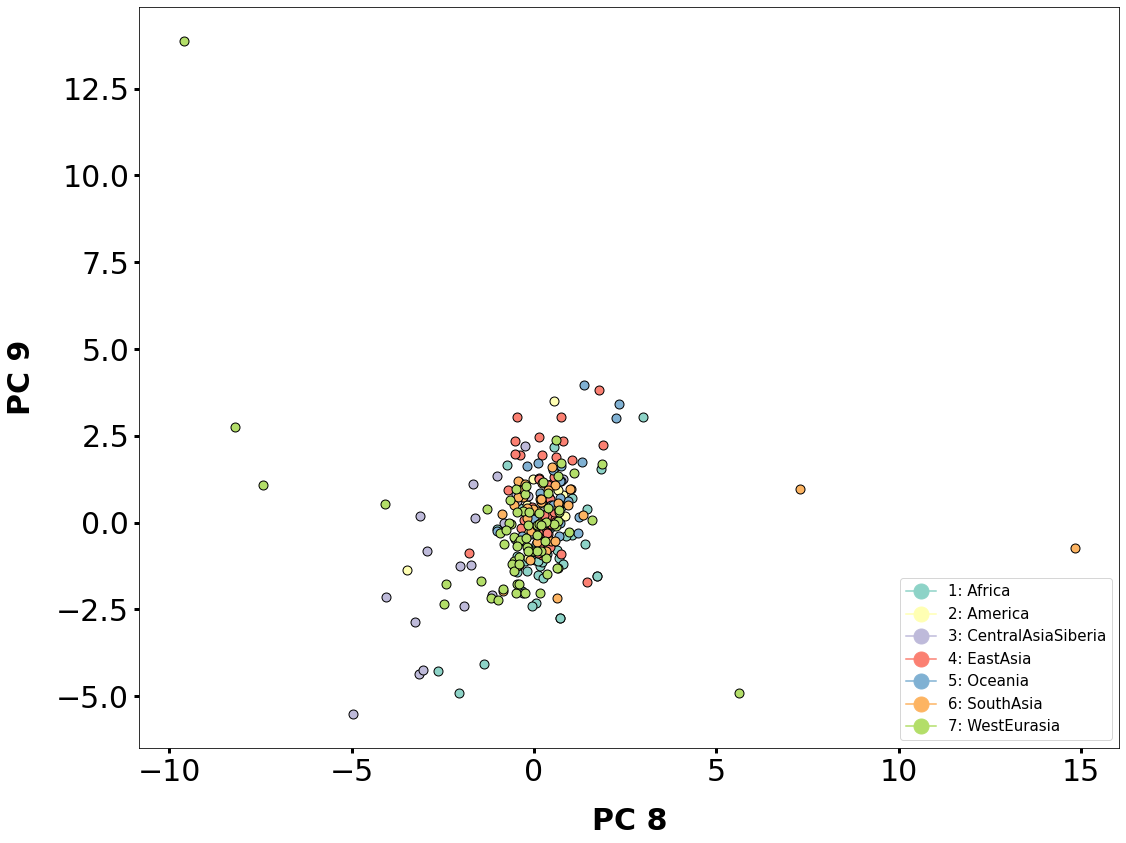

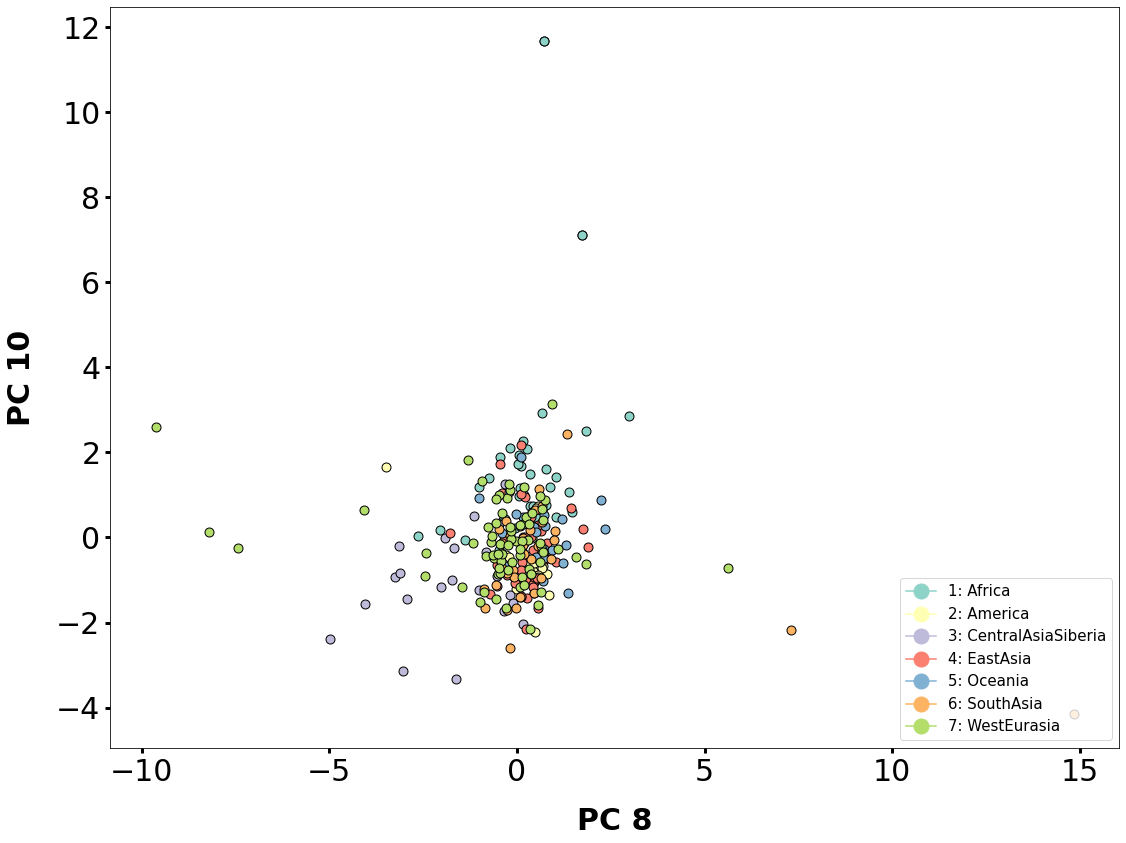

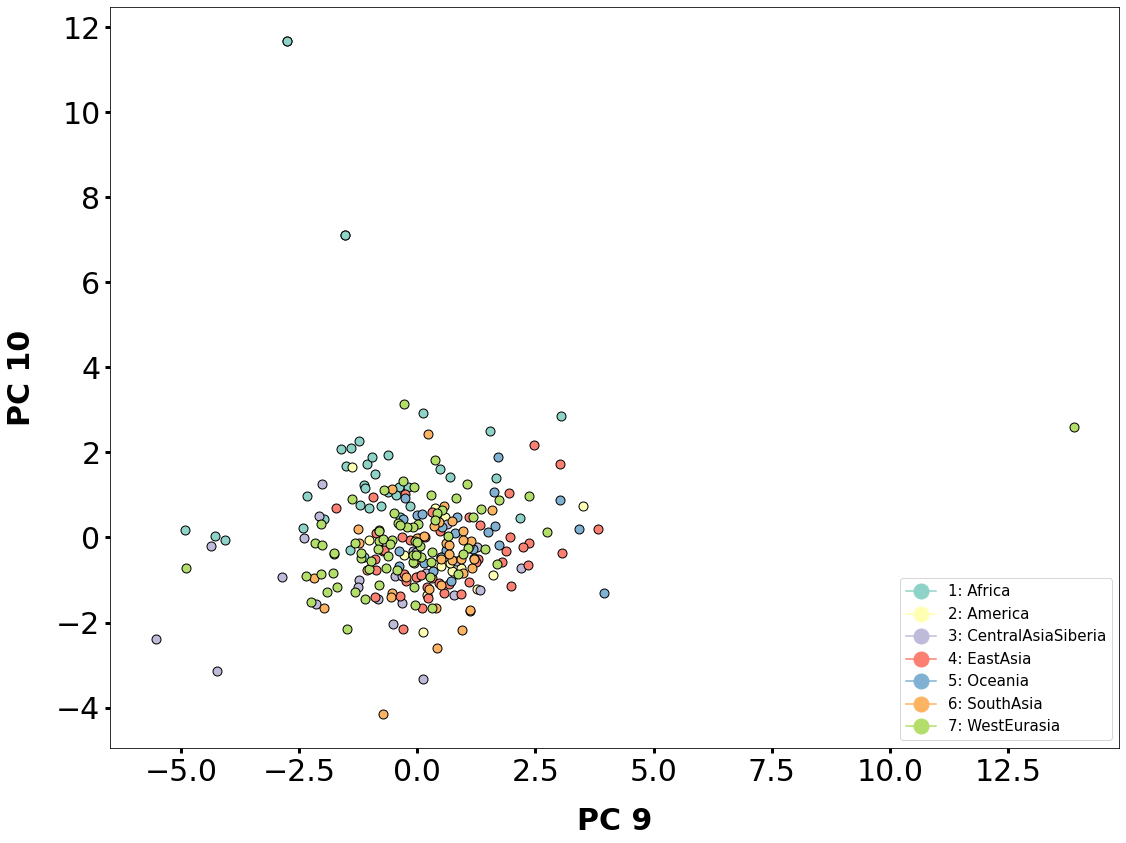

In [29]:
components = [1,2,3,4,5,6,7,8,9,10]

combinations_components = list(combinations(components,2))
for i in combinations_components:
    plot_scatter_cluster(data=df_pca, abscissa='component_'+str(i[0]), ordinate='component_'+str(i[1]), label_horizontal='PC '+ str(i[0]), label_vertical='PC '+str(i[1]), factor='REGION', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    #print(str(i[0]))
#    plot_scatter_cluster(data=df_pca, abscissa='component_8', ordinate='component_9', label_horizontal='Component 1', label_vertical='Component 3', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    

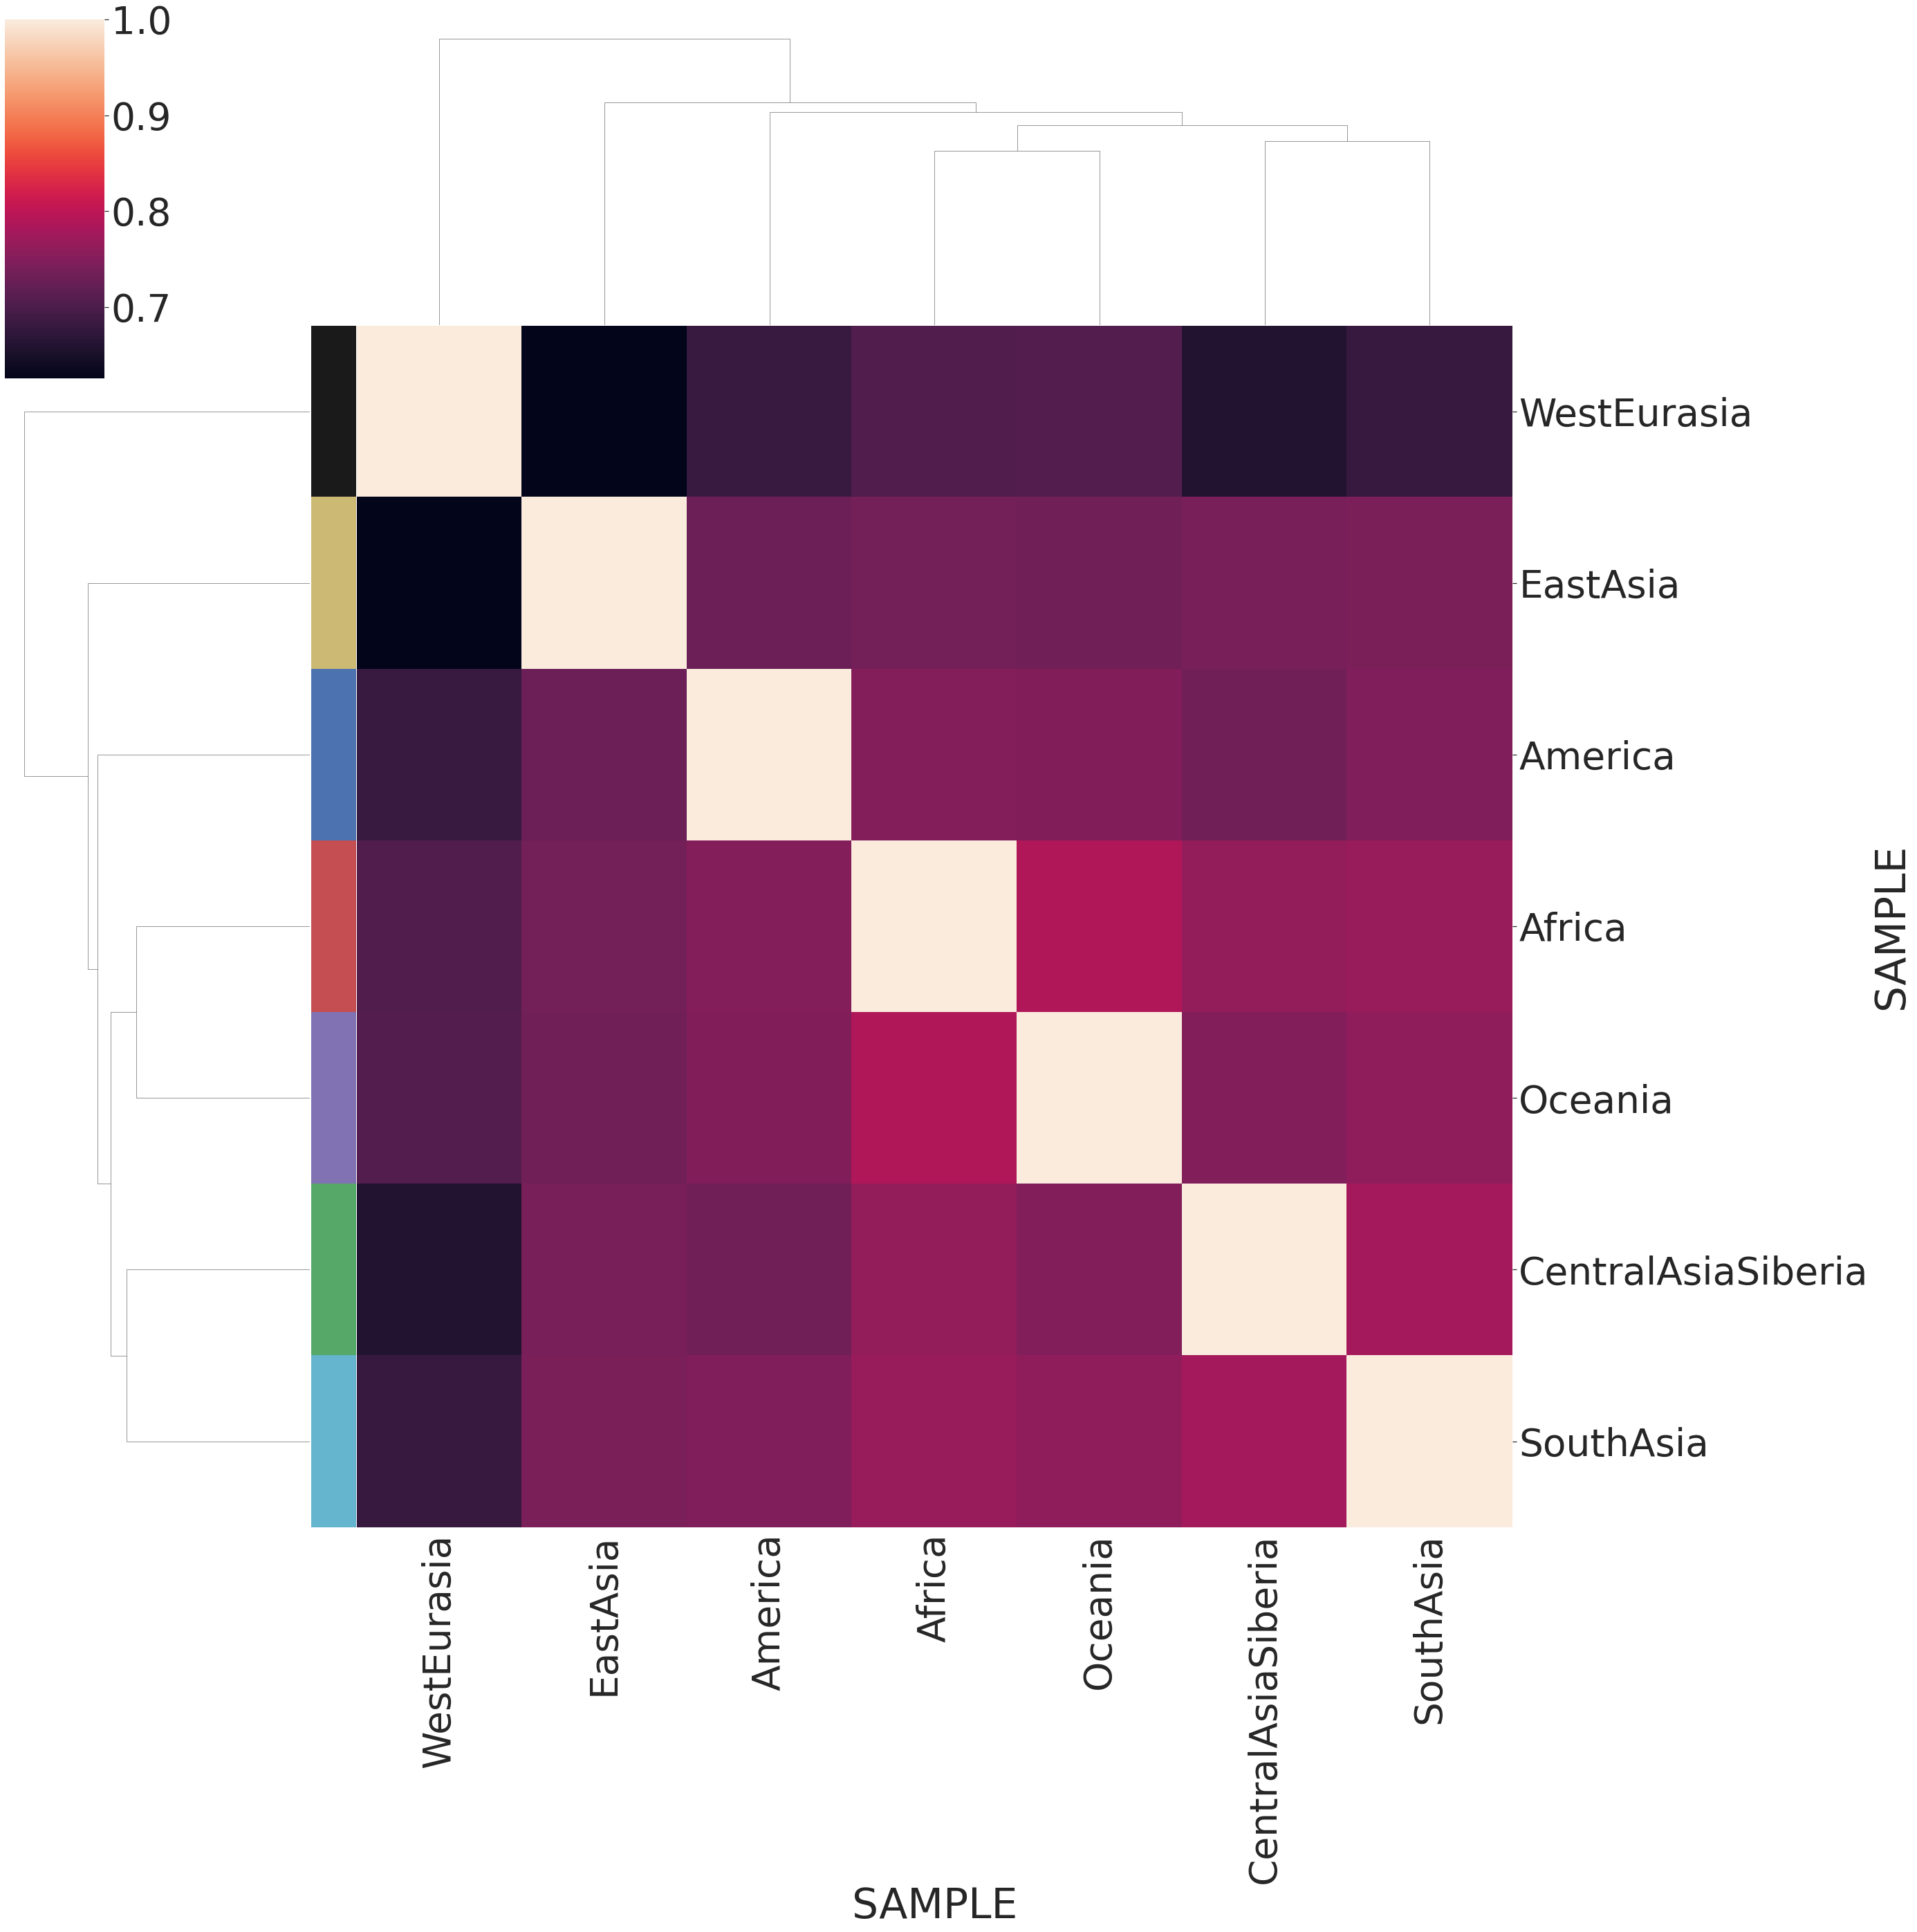

In [30]:
freq = final_cnv.iloc[:,3:283]
freq_input = freq.rename(columns=features['REGION'])
df = freq_input.T
#df = df.reset_index()

#df.groupby('SAMPLE').count().div(df.groupby('SAMPLE').size(),0)


df = df.notnull().groupby(level=0).mean()

df = df.T

lut = dict(zip(df.columns.unique(), "rbgymck"))
lut

seaborn.set(font_scale=5)
corrmatrix = df.corr(method='spearman')
row_colors = df.columns.map(lut)
seaborn.clustermap(corrmatrix, row_colors=row_colors, row_cluster=True, figsize=(40,40))
#plt.savefig('clustermap_regions.pdf')

In [31]:
feature_table = pd.read_table('/branchinecta/jbazanwilliamson/GCF_009914755.1_T2T-CHM13v2.0_feature_table.txt')#, index_col='chromosome')
report = pd.read_table('/branchinecta/jbazanwilliamson/GCF_009914755.1_T2T-CHM13v2.0_assembly_report.txt')

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [32]:
chm13_gene_anotation = feature_table.merge(report, left_on='genomic_accession', right_on='RefSeq-Accn')
chm13_gene_anotation[chm13_gene_anotation['class'] == 'protein_coding']
chm13_gene_anotation


# feature                   class         assembly     assembly_unit  \
0           gene          protein_coding  GCF_009914755.1  Primary Assembly   
1           mRNA                     NaN  GCF_009914755.1  Primary Assembly   
2            CDS            with_protein  GCF_009914755.1  Primary Assembly   
3           gene                  lncRNA  GCF_009914755.1  Primary Assembly   
4          ncRNA                  lncRNA  GCF_009914755.1  Primary Assembly   
...          ...                     ...              ...               ...   
236307      gene          protein_coding  GCF_009914755.1  Primary Assembly   
236308      mRNA                     NaN  GCF_009914755.1  Primary Assembly   
236309       CDS            with_protein  GCF_009914755.1  Primary Assembly   
236310      gene  transcribed_pseudogene  GCF_009914755.1  Primary Assembly   
236311  misc_RNA                     NaN  GCF_009914755.1  Primary Assembly   

          seq_type chromosome genomic_accession     start       end strand  \
0       chromosome          1       NC_060925.1     11134     37628      -   
1       chromosome          1       NC_060925.1     11134     37628      -   
2       chromosome          1       NC_060925.1     13463     37628      -   
3       chromosome          1       NC_060925.1     20892     23710      -   
4       chromosome          1       NC_060925.1     20892     23710      -   
...            ...        ...               ...       ...       ...    ...   
236307  chromosome          Y       NC_060948.1  62446549  62449392      +   
236308  chromosome          Y       NC_060948.1  62446549  62449392      +   
236309  chromosome          Y       NC_060948.1  62446549  62449100      +   
236310  chromosome          Y       NC_060948.1  62449384  62451910      -   
236311  chromosome          Y       NC_060948.1  62449384  62451910      -   

        ... Sequence-Name       Sequence-Role Assigned-Molecule  \
0       ...             1  assembled-molecule                 1   
1       ...             1  assembled-molecule                 1   
2       ...             1  assembled-molecule                 1   
3       ...             1  assembled-molecule                 1   
4       ...             1  assembled-molecule                 1   
...     ...           ...                 ...               ...   
236307  ...             Y  assembled-molecule                 Y   
236308  ...             Y  assembled-molecule                 Y   
236309  ...             Y  assembled-molecule                 Y   
236310  ...             Y  assembled-molecule                 Y   
236311  ...             Y  assembled-molecule                 Y   

       Assigned-Molecule-Location/Type GenBank-Accn  Relationship  \
0                           Chromosome   CP068277.2             =   
1                           Chromosome   CP068277.2             =   
2                           Chromosome   CP068277.2             =   
3                           Chromosome   CP068277.2             =   
4                           Chromosome   CP068277.2             =   
...                                ...          ...           ...   
236307                      Chromosome   CP086569.2             =   
236308                      Chromosome   CP086569.2             =   
236309                      Chromosome   CP086569.2             =   
236310                      Chromosome   CP086569.2             =   
236311                      Chromosome   CP086569.2             =   

        RefSeq-Accn     Assembly-Unit  Sequence-Length UCSC-style-name  
0       NC_060925.1  Primary Assembly        248387328              na  
1       NC_060925.1  Primary Assembly        248387328              na  
2       NC_060925.1  Primary Assembly        248387328              na  
3       NC_060925.1  Primary Assembly        248387328              na  
4       NC_060925.1  Primary Assembly        248387328              na  
...             ...               ...            

<h1> Phylo

In [33]:
from Bio.Phylo.TreeConstruction import _Matrix
from Bio.Phylo.TreeConstruction import DistanceMatrix
from scipy.spatial.distance import pdist, squareform
import scipy.stats

a = scipy.stats.zscore(counts, axis=1)
distances = pdist(np.array(a), metric='euclidean')
dist_matrix = squareform(distances)
dist_matrix.shape

dist_matrix

name =  list(counts.index)
matrix = dist_matrix
dist_matrix

array([[  0.        , 112.19325944, 111.47415944, ...,  80.29433472,
        115.50946032,  79.13034016],
       [112.19325944,   0.        ,  86.09364061, ..., 110.63406743,
         94.94953433, 114.72423144],
       [111.47415944,  86.09364061,   0.        , ..., 112.74954164,
         95.06704434, 114.7662127 ],
       ...,
       [ 80.29433472, 110.63406743, 112.74954164, ...,   0.        ,
        101.46482091,  77.60227832],
       [115.50946032,  94.94953433,  95.06704434, ..., 101.46482091,
          0.        , 105.56634077],
       [ 79.13034016, 114.72423144, 114.7662127 , ...,  77.60227832,
        105.56634077,   0.        ]])

In [34]:
lut = dict(zip(features['REGION'].unique(), "rbgymck"))

row_colors = features['REGION'].map(lut)
row_color = row_colors.to_dict()
lut

features

REGION           COUNTRY
SAMPLE                                          
LP6005441-DNA_A01  WestEurasia  Russia(Caucasus)
LP6005441-DNA_A03      Oceania    PapuaNewGuinea
LP6005441-DNA_A04      America          Colombia
LP6005441-DNA_A05  WestEurasia            France
LP6005441-DNA_A06  WestEurasia    Italy(Bergamo)
...                        ...               ...
LP6007069-DNA_A01  WestEurasia            Greece
SS6004471               Africa             Congo
SS6004477              Oceania         Australia
SS6004478              Oceania         Australia
SS6004480               Africa             Sudan

[269 rows x 2 columns]

In [35]:
from biotite.sequence.phylo import neighbor_joining
#track features for pca & tsne
#features = features.sort_index()

#names.get_indices()
labels = list(counts.index)
#labels = list(features['10-Region'])
tree = biotite.sequence.phylo.neighbor_joining(dist_matrix)
t = print(tree.to_newick(labels=labels, include_distance=True))


#with open('newick_tree.tree', 'a') as f:
#    f.write(t)


(((((((((LP6005677-DNA_G01:35.561798095703125,LP6005443-DNA_C09:35.29170227050781):0.2708747386932373,LP6005442-DNA_A03:33.19390869140625):0.8448414206504822,LP6005441-DNA_E08:32.0118408203125):0.36954545974731445,((LP6005677-DNA_D01:33.088199615478516,(LP6005443-DNA_E09:30.588939666748047,LP6005443-DNA_A01:29.82244873046875):0.3365451693534851):0.2576475143432617,(LP6005443-DNA_E06:33.55488967895508,LP6005442-DNA_A11:31.513141632080078):2.1019678115844727):0.37157773971557617):0.13871672749519348,((LP6005443-DNA_F06:32.35394287109375,(LP6005442-DNA_G09:30.89543914794922,LP6005442-DNA_A08:30.01471710205078):0.7294837832450867):0.42273300886154175,((LP6005443-DNA_B02:30.501998901367188,LP6005441-DNA_G02:31.44796371459961):0.7777442336082458,(LP6005442-DNA_G10:33.014381408691406,LP6005442-DNA_A10:33.01811981201172):0.5949555039405823):0.12660054862499237):0.16439196467399597):0.036836910992860794,(((((((((LP6005677-DNA_E01:29.92431640625,LP6005443-DNA_F01:29.71918487548828):0.41043418645

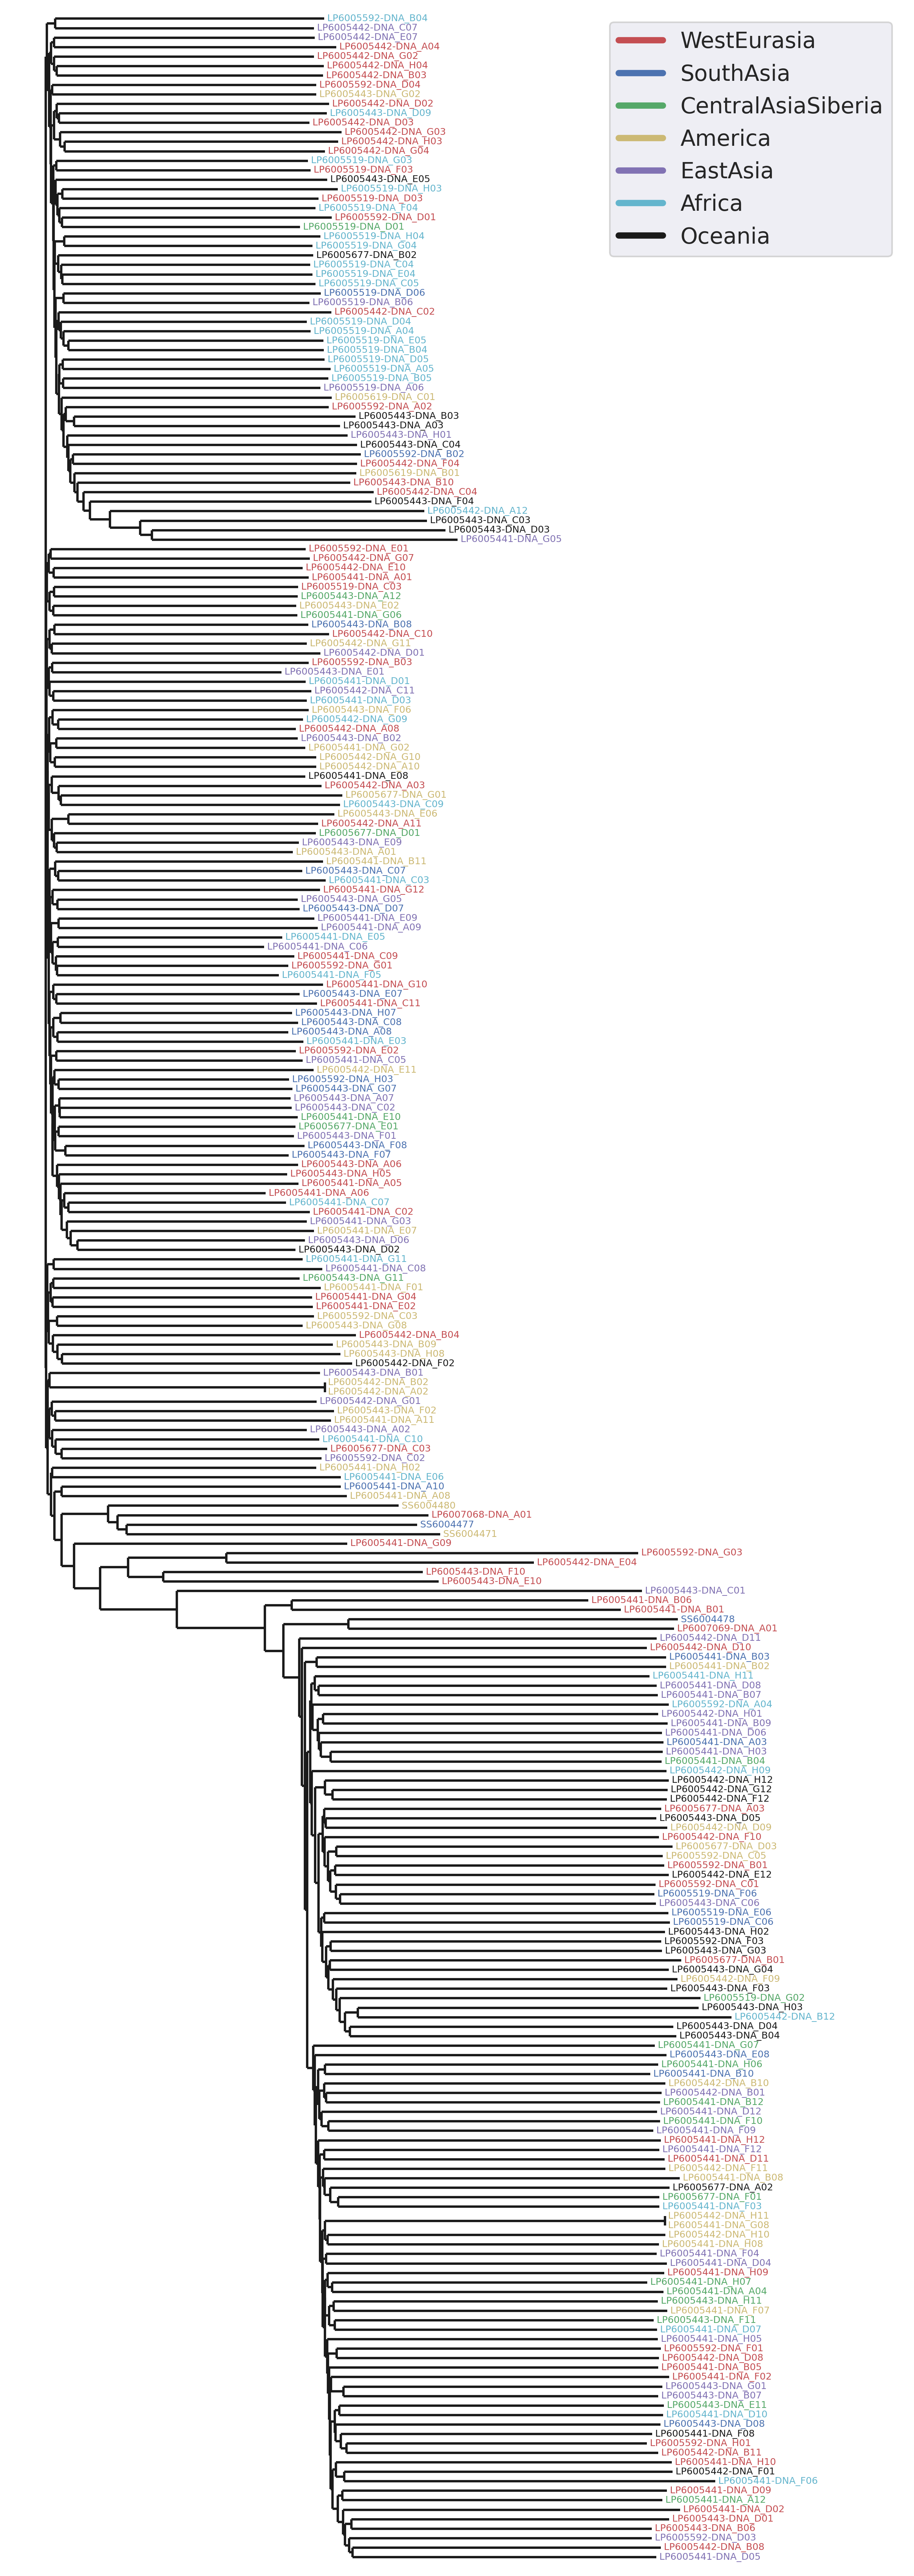

In [36]:
from Bio import Phylo
from io import StringIO 
import pylab
from matplotlib.lines import Line2D

handle = StringIO(str(tree.to_newick(labels=labels, include_distance=True)))
tree_2 = Phylo.read(handle, "newick")
tree_2.ladderize()

matplotlib.rc('font', size=6)
    # set the size of the figure
fig = plt.figure(figsize=(10, 70), dpi=300)
    # alternatively
    # fig.set_size_inches(10, 40)
axes = fig.add_subplot(3, 1, 1)
fig.tight_layout()
Phylo.draw(tree_2, 
           axes=axes, 
           do_show=False,
           label_colors= row_color)
pylab.axis('off')

### CUSTOM LEGEND
custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='y', lw=4),
                Line2D([0], [0], color='m', lw=4),
                Line2D([0], [0], color='c', lw=4),
                Line2D([0], [0], color='k', lw=4)]

#fig, ax = plt.subplots()
plt.legend(custom_lines, ['WestEurasia', 'SouthAsia', 'CentralAsiaSiberia', 'America', 'EastAsia', 'Africa','Oceania'],  loc =0, prop={'size': 14})

#plt.savefig('neighbor-joining-tree_euclidean.png')

In [37]:
from biotite.sequence.phylo import upgma

#features = features.sort_index()

#names.get_indices()
labels = list(counts.index)
#labels = list(features['10-Region'])
tree = biotite.sequence.phylo.upgma(dist_matrix)
t = print(tree.to_newick(labels=labels, include_distance=True))



((((((((SS6004480:37.87313461303711,LP6007068-DNA_A01:37.87313461303711):1.3934249877929688,(SS6004477:38.12808609008789,SS6004471:38.12808609008789):1.1384735107421875):1.2760467529296875,((((((((((((((LP6005677-DNA_G01:35.193294525146484,(((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((LP6005677-DNA_E01:29.82175064086914,LP6005443-DNA_F01:29.82175064086914):0.24442100524902344,((((((((LP6005592-DNA_H03:29.17831802368164,((LP6005443-DNA_F07:28.753286361694336,((LP6005443-DNA_D02:27.660436630249023,(LP6005441-DNA_C07:27.071521759033203,(LP6005441-DNA_C06:26.223451614379883,LP6005441-DNA_A06:26.223451614379883):0.8480701446533203):0.5889148712158203):0.6765594482421875,LP6005443-DNA_C02:28.33699607849121):0.416290283203125):0.2269458770751953,LP6005443-DNA_A07:28.98023223876953):0.19808578491210938):0.042934417724609375,LP6005443-DNA_H05:29.22125244140625):0.08448982238769531,(LP6005592-DNA_G01:28.828197479248047,(LP6005441-DNA_F05:28.345245361328125,LP6005441-

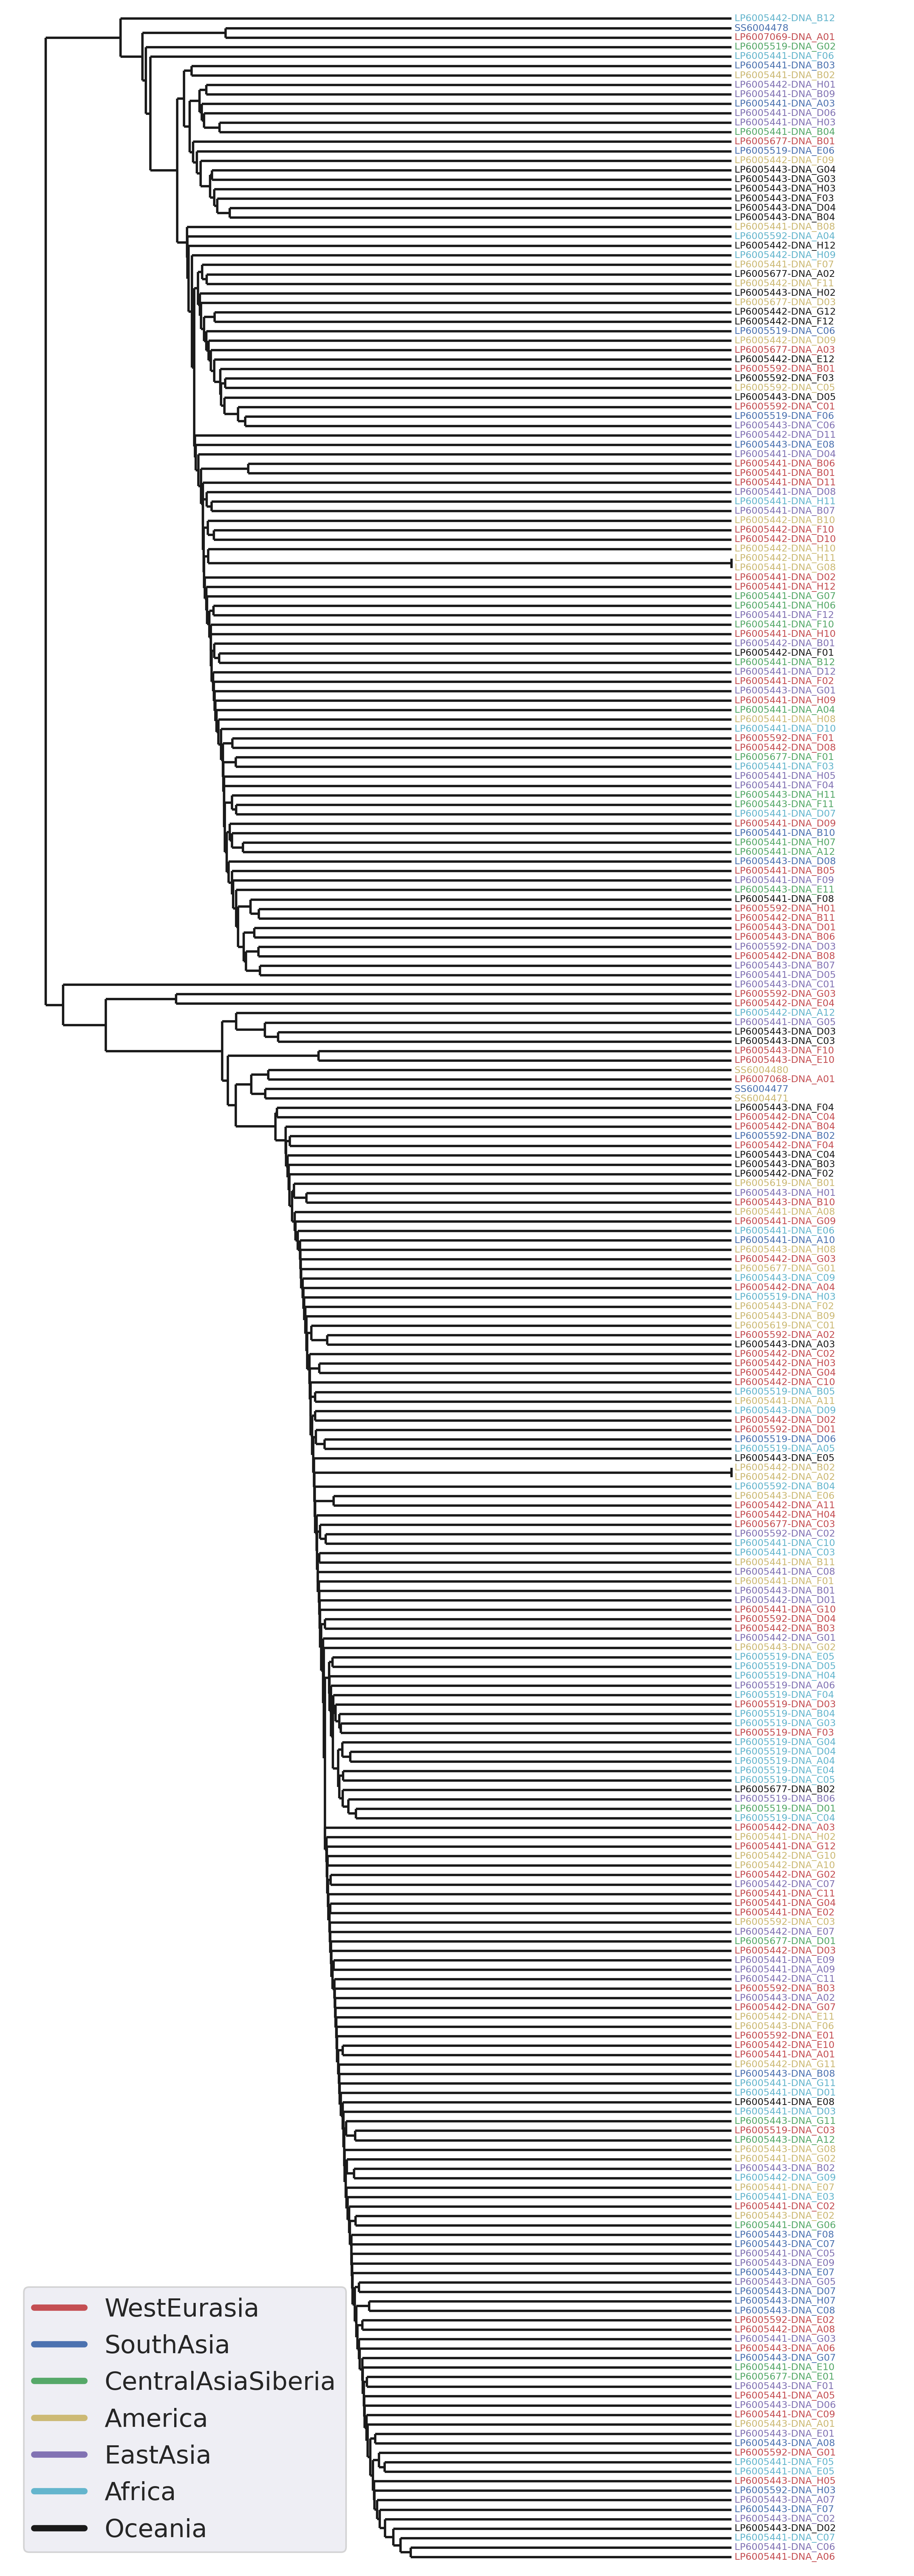

In [38]:
from Bio import Phylo
from io import StringIO 
from matplotlib.lines import Line2D
import pylab

handle = StringIO(str(tree.to_newick(labels=labels, include_distance=True)))
tree_2 = Phylo.read(handle, "newick")
tree_2.ladderize()

matplotlib.rc('font', size=6)
#matplotlib.rc('font', size=6)
    # set the size of the figure
#fig = plt.figure(figsize=(20, 80), dpi=300)
fig = plt.figure(figsize=(10, 70), dpi=300)
    # alternatively
    # fig.set_size_inches(10, 40)
axes = fig.add_subplot(3, 1, 1)
fig.tight_layout()
Phylo.draw(tree_2, 
           axes=axes, 
           do_show=False,
           label_colors= row_color)
pylab.axis('off')

### CUSTOM LEGEND
custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='y', lw=4),
                Line2D([0], [0], color='m', lw=4),
                Line2D([0], [0], color='c', lw=4),
                Line2D([0], [0], color='k', lw=4)]

#fig, ax = plt.subplots()
plt.legend(custom_lines, ['WestEurasia', 'SouthAsia', 'CentralAsiaSiberia', 'America', 'EastAsia', 'Africa','Oceania'],  loc =3, prop={'size': 16})

#plt.savefig('upgma-tree_euclidean.png')
#plt.legend(row_color, loc ="upper left")
#plt.savefig('upgma-tree.pdf')
#Phylo.write(tree_2, "egfr-family-annotated.xml", "phyloxml")

<h1> Vst

In [39]:
#change to df when using telomeres and centromeres filtration
input_vst = chm13.pivot_table(index=["CHR", "START", "END"], 
                    columns='SAMPLE', 
                    values='SCORE').reset_index()


input_vst

SAMPLE   CHR     START       END  LP6005441-DNA_A01  LP6005441-DNA_A03  \
0       chr1    102061    111943               12.0               15.0   
1       chr1    521722    540598                NaN                NaN   
2       chr1    613436    625116                NaN                NaN   
3       chr1    839350    851555                NaN                NaN   
4       chr1   1041679   1050074                NaN                NaN   
...      ...       ...       ...                ...                ...   
10743   chrY  26436587  26458551                5.0                0.0   
10744   chrY  26778516  26788355                4.0                0.0   
10745   chrY  62325695  62345374                NaN                NaN   
10746   chrY  62345374  62363313                NaN                NaN   
10747   chrY  62411230  62422895                NaN                NaN   

SAMPLE  LP6005441-DNA_A04  LP6005441-DNA_A05  LP6005441-DNA_A06  \
0                    11.0               14.0               15.0   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     1.0                1.0                NaN   
...                   ...                ...                ...   
10743                 0.0                4.0                4.0   
10744                 0.0                3.0                3.0   
10745                 NaN                NaN                NaN   
10746                 NaN                NaN                NaN   
10747                 NaN                NaN                NaN   

SAMPLE  LP6005441-DNA_A08  LP6005441-DNA_A09  ...  LP6005677-DNA_D03  \
0                    12.0               11.0  ...               15.0   
1                     NaN                NaN  ...                1.0   
2                     NaN                NaN  ...                NaN   
3                     NaN                NaN  ...                NaN   
4                     1.0                NaN  ...                1.0   
...                   ...                ...  ...                ...   
10743                 3.0                NaN  ...                0.0   
10744                 4.0                NaN  ...                0.0   
10745                 NaN                1.0  ...                NaN   
10746                 NaN                1.0  ...                NaN   
10747                 NaN                1.0  ...                NaN   

SAMPLE  LP6005677-DNA_E01  LP6005677-DNA_F01  LP6005677-DNA_G01  \
0                    13.0               14.0               14.0   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     1.0                NaN                NaN   
4                     NaN                NaN                NaN   
...                   ...                ...                ...   
10743                 4.0                0.0                4.0   
10744                 3.0                0.0                4.0   
10745                 NaN                NaN                NaN   
10746                 NaN                NaN                NaN   
10747                 NaN                NaN                NaN   

SAMPLE  LP6007068-DNA_A01  LP6007069-DNA_A01  SS6004471  SS6004477  SS6004478  \
0                    14.0               12.0       15.0       11.0       13.0   
1                     NaN                NaN        1.0        NaN        1.0   
2                     NaN                NaN        NaN        NaN        NaN   
3                     NaN                3.0        NaN        NaN        NaN   
4                     1.0                1.0        1.0        NaN        NaN   
...                   ...                ...        ...        ...        ...   
10743                 4.0                0.0        3.0        4.0   

In [40]:
coordinates = input_vst.iloc[:,0:2]
cnvs = input_vst.iloc[:,3:284]
cnvs = cnvs.T
cnvs = cnvs.fillna(2)
cnvs

0      1      2      3      4      5      6      7      \
SAMPLE                                                                      
LP6005441-DNA_A01   12.0    2.0    2.0    2.0    2.0    3.0    2.0    2.0   
LP6005441-DNA_A03   15.0    2.0    2.0    2.0    2.0    2.0    2.0    2.0   
LP6005441-DNA_A04   11.0    2.0    2.0    2.0    1.0    3.0    2.0    2.0   
LP6005441-DNA_A05   14.0    2.0    2.0    2.0    1.0    2.0    2.0    2.0   
LP6005441-DNA_A06   15.0    2.0    2.0    2.0    2.0    3.0    2.0    2.0   
...                  ...    ...    ...    ...    ...    ...    ...    ...   
LP6007069-DNA_A01   12.0    2.0    2.0    3.0    1.0    2.0    2.0    2.0   
SS6004471           15.0    1.0    2.0    2.0    1.0    3.0    1.0    2.0   
SS6004477           11.0    2.0    2.0    2.0    2.0    3.0    1.0    2.0   
SS6004478           13.0    1.0    2.0    2.0    2.0    3.0    2.0    2.0   
SS6004480           16.0    1.0    2.0    2.0    2.0    3.0    2.0    2.0   

                   8      9      ...  10738  10739  10740  10741  10742  \
SAMPLE                           ...                                      
LP6005441-DNA_A01    2.0    2.0  ...    3.0    4.0    4.0    4.0    3.0   
LP6005441-DNA_A03    2.0    2.0  ...    0.0    0.0    0.0    0.0    0.0   
LP6005441-DNA_A04    2.0    2.0  ...    0.0    0.0    0.0    0.0    0.0   
LP6005441-DNA_A05    2.0    2.0  ...    2.0    3.0    3.0    3.0    2.0   
LP6005441-DNA_A06    2.0    2.0  ...    2.0    3.0    3.0    3.0    3.0   
...                  ...    ...  ...    ...    ...    ...    ...    ...   
LP6007069-DNA_A01    2.0    2.0  ...    0.0    0.0    0.0    1.0    1.0   
SS6004471            2.0    2.0  ...    3.0    3.0    3.0    3.0    3.0   
SS6004477            2.0    2.0  ...    2.0    3.0    3.0    4.0    3.0   
SS6004478            2.0    2.0  ...    0.0    0.0    0.0    1.0    0.0   
SS6004480            2.0    2.0  ...    3.0    4.0    3.0    3.0    3.0   

                   10743  10744  10745  10746  10747  
SAMPLE                                                
LP6005441-DNA_A01    5.0    4.0    2.0    2.0    2.0  
LP6005441-DNA_A03    0.0    0.0    2.0    2.0    2.0  
LP6005441-DNA_A04    0.0    0.0    2.0    2.0    2.0  
LP6005441-DNA_A05    4.0    3.0    2.0    2.0    2.0  
LP6005441-DNA_A06    4.0    3.0    2.0    2.0    2.0  
...                  ...    ...    ...    ...    ...  
LP6007069-DNA_A01    0.0    0.0    2.0    2.0    2.0  
SS6004471            3.0    3.0    2.0    2.0    2.0  
SS6004477            4.0    3.0    2.0    2.0    2.0  
SS6004478            0.0    0.0    2.0    2.0    2.0  
SS6004480            4.0    4.0    2.0    2.0    2.0  

[269 rows x 10748 columns]

In [41]:
dt = features.merge(cnvs, left_index=True, right_index=True)
dt

REGION           COUNTRY     0    1    2    3    4  \
SAMPLE                                                                       
LP6005441-DNA_A01  WestEurasia  Russia(Caucasus)  12.0  2.0  2.0  2.0  2.0   
LP6005441-DNA_A03      Oceania    PapuaNewGuinea  15.0  2.0  2.0  2.0  2.0   
LP6005441-DNA_A04      America          Colombia  11.0  2.0  2.0  2.0  1.0   
LP6005441-DNA_A05  WestEurasia            France  14.0  2.0  2.0  2.0  1.0   
LP6005441-DNA_A06  WestEurasia    Italy(Bergamo)  15.0  2.0  2.0  2.0  2.0   
...                        ...               ...   ...  ...  ...  ...  ...   
LP6007069-DNA_A01  WestEurasia            Greece  12.0  2.0  2.0  3.0  1.0   
SS6004471               Africa             Congo  15.0  1.0  2.0  2.0  1.0   
SS6004477              Oceania         Australia  11.0  2.0  2.0  2.0  2.0   
SS6004478              Oceania         Australia  13.0  1.0  2.0  2.0  2.0   
SS6004480               Africa             Sudan  16.0  1.0  2.0  2.0  2.0   

                     5    6    7  ...  10738  10739  10740  10741  10742  \
SAMPLE                            ...                                      
LP6005441-DNA_A01  3.0  2.0  2.0  ...    3.0    4.0    4.0    4.0    3.0   
LP6005441-DNA_A03  2.0  2.0  2.0  ...    0.0    0.0    0.0    0.0    0.0   
LP6005441-DNA_A04  3.0  2.0  2.0  ...    0.0    0.0    0.0    0.0    0.0   
LP6005441-DNA_A05  2.0  2.0  2.0  ...    2.0    3.0    3.0    3.0    2.0   
LP6005441-DNA_A06  3.0  2.0  2.0  ...    2.0    3.0    3.0    3.0    3.0   
...                ...  ...  ...  ...    ...    ...    ...    ...    ...   
LP6007069-DNA_A01  2.0  2.0  2.0  ...    0.0    0.0    0.0    1.0    1.0   
SS6004471          3.0  1.0  2.0  ...    3.0    3.0    3.0    3.0    3.0   
SS6004477          3.0  1.0  2.0  ...    2.0    3.0    3.0    4.0    3.0   
SS6004478          3.0  2.0  2.0  ...    0.0    0.0    0.0    1.0    0.0   
SS6004480          3.0  2.0  2.0  ...    3.0    4.0    3.0    3.0    3.0   

                   10743  10744  10745  10746  10747  
SAMPLE                                                
LP6005441-DNA_A01    5.0    4.0    2.0    2.0    2.0  
LP6005441-DNA_A03    0.0    0.0    2.0    2.0    2.0  
LP6005441-DNA_A04    0.0    0.0    2.0    2.0    2.0  
LP6005441-DNA_A05    4.0    3.0    2.0    2.0    2.0  
LP6005441-DNA_A06    4.0    3.0    2.0    2.0    2.0  
...                  ...    ...    ...    ...    ...  
LP6007069-DNA_A01    0.0    0.0    2.0    2.0    2.0  
SS6004471            3.0    3.0    2.0    2.0    2.0  
SS6004477            4.0    3.0    2.0    2.0    2.0  
SS6004478            0.0    0.0    2.0    2.0    2.0  
SS6004480            4.0    4.0    2.0    2.0    2.0  

[269 rows x 10750 columns]

In [42]:
####### Groupby regions #######
dt_group = dt.groupby('REGION')

dt_groupped = []
regions = features['REGION'].unique()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))
    

#### Names to pair-population
regions = dt['REGION'].unique()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])

In [44]:
## VST for pair-population

from vst_function import *
vst_dt = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
        statistic = vst((dt_groupped[region[0]]), (dt_groupped[region[1]]))
        vst_dt.append(statistic)

vst_dt = pd.DataFrame(vst_dt).set_axis(combination_names)
#vst_dt = vst_dt.T
vst_dt

0         1         2         3      \
WestEurasia-Oceania             0.018341  0.051059       NaN  0.011431   
WestEurasia-America             0.030527  0.011290       NaN  0.034343   
WestEurasia-Africa              0.106892  0.026284       NaN  0.035764   
WestEurasia-EastAsia            0.053486  0.008431  0.021739  0.010159   
WestEurasia-SouthAsia           0.139888  0.009650       NaN  0.016641   
WestEurasia-CentralAsiaSiberia  0.045162  0.026437       NaN  0.024486   
Oceania-America                 0.027853  0.058375       NaN  0.078571   
Oceania-Africa                  0.177461  0.022490       NaN  0.053179   
Oceania-EastAsia                0.027726  0.063124  0.021739       NaN   
Oceania-SouthAsia               0.105252  0.076120       NaN  0.036842   
Oceania-CentralAsiaSiberia      0.033318  0.026416       NaN  0.055178   
America-Africa                  0.227956  0.026016       NaN  0.016408   
America-EastAsia                0.018746  0.016103  0.021739  0.085938   
America-SouthAsia               0.082107  0.020000       NaN  0.025000   
America-CentralAsiaSiberia      0.023840  0.032945       NaN  0.023342   
Africa-EastAsia                 0.250026  0.031120  0.021739  0.064943   
Africa-SouthAsia                0.388651  0.038111       NaN  0.019748   
Africa-CentralAsiaSiberia       0.274649  0.014721       NaN  0.016323   
EastAsia-SouthAsia              0.041226  0.012357  0.021739  0.041078   
EastAsia-CentralAsiaSiberia     0.014398  0.033816  0.021739  0.061033   
SouthAsia-CentralAsiaSiberia    0.067349  0.042486       NaN  0.017288   

                                   4         5         6         7      \
WestEurasia-Oceania             0.032919  0.211830  0.018174  0.026963   
WestEurasia-America             0.011314  0.010878  0.015387  0.015938   
WestEurasia-Africa              0.009836  0.008914  0.012906  0.012066   
WestEurasia-EastAsia            0.016229  0.013078  0.008636  0.008846   
WestEurasia-SouthAsia           0.031034  0.011604  0.036289  0.009065   
WestEurasia-CentralAsiaSiberia  0.026242  0.011974  0.028864  0.011155   
Oceania-America                 0.068333  0.258437  0.059375  0.083034   
Oceania-Africa                  0.035647  0.291658  0.016585  0.025474   
Oceania-EastAsia                0.022091  0.229167  0.028340  0.041079   
Oceania-SouthAsia               0.112390  0.208019  0.021033  0.037718   
Oceania-CentralAsiaSiberia      0.117421  0.242099  0.022237  0.035904   
America-Africa                  0.019919  0.016400  0.037339  0.036355   
America-EastAsia                0.028048  0.019209  0.019959  0.018577   
America-SouthAsia               0.031061  0.019127  0.073701  0.025170   
America-CentralAsiaSiberia      0.033232  0.023597  0.076316  0.036190   
Africa-EastAsia                 0.014854  0.017085  0.018936  0.018146   
Africa-SouthAsia                0.047691  0.015310  0.024365  0.015484   
Africa-CentralAsiaSiberia       0.044249  0.017432  0.022123  0.015175   
EastAsia-SouthAsia              0.071397  0.012061  0.049344  0.012753   
EastAsia-CentralAsiaSiberia     0.065518  0.014204  0.042945  0.016977   
SouthAsia-CentralAsiaSiberia    0.015568  0.015440  0.015811  0.016313   

                                   8         9      ...     10738     10739  \
WestEurasia-Oceania             0.013699       NaN  ...  0.011049  0.014368   
WestEurasia-America             0.013699       NaN  ...  0.019031  0.037490   
WestEurasia-Africa              0.013699  0.040287  ...  0.016610  0.012335   
WestEurasia-EastAsia            0.013699  0.021739  ...  0.017906  0.017626   
WestEurasia-SouthAsia           0.045439  0.026316  ...  0.045856  0.034583   
WestEurasia-CentralAsiaSiberia  0.013699       NaN  ...  0.068812  0.052202   
Oceania-America                      NaN       NaN  ...  0.028203  0.038188   
Oceania-Africa                       NaN  0.033682  ...  0.028906  0.032129   
Oceania-EastAsia                     NaN  0.021739  ...  0.018641 

In [45]:
filtering_vst = pd.DataFrame(vst_dt.T)>=0.2
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
#filtering_vst = filtering_vst.set_axis(combination_names)
filtering_vst

WestEurasia-Oceania  WestEurasia-America  WestEurasia-Africa  \
0                    False                False               False   
1                    False                False               False   
2                    False                False               False   
3                    False                False               False   
4                    False                False               False   
...                    ...                  ...                 ...   
10743                False                False               False   
10744                False                False               False   
10745                False                False               False   
10746                False                False               False   
10747                False                False               False   

       WestEurasia-EastAsia  WestEurasia-CentralAsiaSiberia  Oceania-America  \
0                     False                           False            False   
1                     False                           False            False   
2                     False                           False            False   
3                     False                           False            False   
4                     False                           False            False   
...                     ...                             ...              ...   
10743                 False                           False            False   
10744                 False                           False            False   
10745                 False                           False            False   
10746                 False                           False            False   
10747                 False                           False            False   

       Oceania-Africa  Oceania-EastAsia  Oceania-SouthAsia  \
0               False             False              False   
1               False             False              False   
2               False             False              False   
3               False             False              False   
4               False             False              False   
...               ...               ...                ...   
10743           False             False              False   
10744           False             False              False   
10745           False             False              False   
10746           False             False              False   
10747           False             False              False   

       Oceania-CentralAsiaSiberia  America-Africa  America-EastAsia  \
0                           False            True             False   
1                           False           False             False   
2                           False           False             False   
3                           False           False             False   
4                           False           False             False   
...                           ...             ...               ...   
10743                       False           False             False   
10744                       False           False             False   
10745                       False           False             False   
10746                       False           False             False   
10747                       False           False             False   

       America-SouthAsia  America-CentralAsiaSiberia  Africa-EastAsia  \
0                  False                       False             True   
1                  False                       False            False   
2                  False                       False            False   
3                  False                       False            False   
4                  False                       False            False   
...                  ...                         ...              ...   
10743              False                       False            False   
10744      

In [46]:
## Coordinates anotation 
vst_dt = vst_dt.T
vst_dt.insert (0, 'chr', cnv['Chr'])
vst_dt.insert (1, 'start', cnv['Start'])
vst_dt.insert (2, 'end', cnv['End'])
vst_dt = vst_dt.round(5)
vst_dt = vst_dt.replace(np.NaN, 0)
vst_dt

NameError: name 'cnv' is not defined

In [47]:
cnv_passed_vst = cnvs.T.iloc[filtering_vst.columns]
cnv_passed_vst

ValueError: invalid literal for int() with base 10: 'WestEurasia-Oceania'